# Etudes techniques

In this notebook, you'll find our code for the various models in this project. It contains :
- The Lasso model
- Linear Regression model
- The SVR model

## Import librairies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import make_scorer


import os

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 238)

In [4]:
sns.set_context("talk")

## Data importations

In these first lines of code, you need to add the path of the CSV file created by the Preprocess notebook.

In [5]:
# Delphine 
#df = pd.read_csv(r"/Users/delphinepaquiry/Downloads/Data.csv")

# Nathan 
df = pd.read_csv(r"C:\Users\Nathan\Desktop\Etude technique\Data.csv")

## Chose Target

In [6]:
target = 'L1L4ZscoreSD'

In [7]:
df[target].unique()

array([-2.5 ,  0.  , -1.4 , -0.2 , -4.  , -2.3 , -0.6 , -1.3 , -0.5 ,
       -2.4 , -1.8 ,  1.2 , -1.1 , -0.9 , -1.5 , -0.3 , -1.2 , -1.6 ,
       -1.  , -3.2 , -0.4 ,  1.  , -2.9 ,  0.2 , -3.5 , -1.7 ,  0.1 ,
        0.6 , -0.1 , -3.  , -0.8 , -2.1 , -1.9 ,  0.5 , -0.7 , -2.6 ,
       -2.8 , -3.8 ,  1.3 ,  2.3 ,  2.1 , -2.  , -2.2 ,  0.4 , -3.1 ,
       -4.1 ,  1.4 , -4.2 , -2.7 ,  0.7 ,  0.8 , -2.11,  0.3 , -3.3 ,
       -4.5 , -3.4 ,  1.8 ,  1.5 ])

### Exploratory data analysis

In [8]:
# view dimensions of dataset
df.shape

(366, 67)

In [9]:
# preview the dataset
df.head()

,Age,Dateexam,DDN,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,datePoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,datePoidsleplushaut,Poids6mois,DatedebutTCA,AgedebutTCA,DuréeTCA,AnorexiedetypeboulemieActuel,utilisationActuellaxatif,utilisationActuelDiurétique,AnorexiedetyperestrictifActuel,AnorexiedetypeboulemiePasse,utilisationPasselaxatif,AnorexiedetyperestrictifPasse,nombreFracture,FracturedefaibleeNRJ1,Agedelamenarche,amenorheprimaire,traitementcontraceptif,Cyclesréguliers,Duréemoisdepuisdernièresmenstruations,Signehyperandrogenie,Hyperactivite,ActivitePhysiqueActuelPratriquee1 h/s,ActivitePhysiquePassePratriquee1,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,Tour de taille,Tour de hanche,rapport taille/hanche,DMOL1L4T1,L1L4ZscoreSD,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l)
0,16.586301,2008-11-28,1992-05-02,28.9,-4.0,168.0,1.0,10.23,26.0,-4.2,9.21,16.500000,2008-10-14,48.0,-0.5,17.01,15.5,2007-10-14,38.0,2007-10-14,15.460274,1.126027,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,16.586301,0.0,0.0,0,9.066667,0.0,0.0,0,0,0.0,900.0,-23.0,53.0,68.0,0.78,0.693,-2.5,2245.1,7.8,25054.3,73.93,16.11,33.32,0.753,172.00,2.070,6.290,12.0,35.8,3.72,96.0,11.8,130.0,8.8,6.3,4.3
1,19.989041,2008-11-28,1988-12-07,37.4,-2.5,164.0,0.1,13.91,37.0,-2.5,13.76,19.800000,2008-10-08,50.0,-0.5,18.59,17.1,2006-01-01,49.0,2008-07-01,19.578082,0.410959,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,12.500000,0.0,1.0,0,2.700000,0.0,0.0,0,0,2.0,830.0,-32.0,59.0,74.0,0.80,1.014,0.0,5106.4,13.6,30218.0,65.21,36.51,14.51,0.342,45.21,1.950,11.210,11.9,36.2,3.66,99.0,14.3,272.0,7.8,2.5,3.2
2,18.076712,2008-06-04,1990-05-12,41.8,-2.0,170.5,1.4,14.39,35.4,-3.0,12.18,18.076712,2008-07-08,54.0,0.0,18.58,17.1,2007-06-01,37.5,2007-10-01,17.400000,0.676712,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,14.000000,0.0,0.0,0,11.300000,0.0,1.0,1,1,2.0,930.0,-27.0,60.0,76.0,0.79,0.837,-1.4,2730.4,6.5,37234.2,86.73,45.02,13.72,0.533,33.27,2.410,6.860,15.0,46.0,4.67,98.0,14.0,177.0,8.1,6.9,3.2
3,16.495890,2009-01-07,1992-07-14,38.5,-2.2,152.0,-1.8,16.68,36.0,-1.0,15.58,13.500000,2006-01-01,40.0,-1.5,17.31,14.5,2007-01-01,36.5,2008-07-12,16.005479,0.490411,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,12.000000,0.0,0.0,2,0.066667,0.0,1.0,1,0,0.0,1230.0,0.0,64.0,77.0,0.83,0.951,-0.2,5372.7,13.9,31601.4,141.80,8.38,28.54,0.864,79.20,1.765,12.080,13.7,40.3,4.41,91.0,11.4,299.0,7.6,7.4,4.2
4,30.290411,2009-01-16,1978-10-10,27.0,-4.4,167.0,0.8,9.68,27.0,-5.0,9.68,30.200000,2008-12-31,40.0,-2.0,14.34,16.2,1995-01-01,25.6,1993-12-01,15.153425,15.136986,0,0.0,0.0,1,0.0,0.0,1,0.0,0.0,13.000000,0.0,0.0,0,116.766667,0.0,0.0,0,0,0.0,800.8,-18.0,52.0,66.0,0.79,0.606,-4.0,2077.2,7.7,23508.0,28.16,34.80,8.83,0.591,90.70,1.480,0.608,9.7,28.3,3.04,93.0,11.7,417.0,6.7,3.0,3.4


### Others Binary Columns

In this notebook we are using continuous variables in our models, so we need to remove the 14 columns of binary variables.

In [10]:
binary_columns= [
    "AnorexiedetypeboulemieActuel",
    "utilisationActuellaxatif",
    "utilisationActuelDiurétique",
    "AnorexiedetyperestrictifActuel",
    "AnorexiedetypeboulemiePasse",
    "utilisationPasselaxatif",
    "AnorexiedetyperestrictifPasse",
    "amenorheprimaire",
    "traitementcontraceptif",
    "Cyclesréguliers",
    "Signehyperandrogenie", 
    "Hyperactivite",
    "ActivitePhysiqueActuelPratriquee1 h/s",
    "ActivitePhysiquePassePratriquee1"    
]

In [11]:
df = df.drop(columns=binary_columns)

### Create Column with date

In [12]:
colonnes_date =[
    'Dateexam',
    'DDN',
    'datePoidsleplusbas',
    'datePoidsleplushaut',
    'DatedebutTCA'
]

#### Convert Dates columns

In [13]:
df['Dateexam'] = pd.to_datetime(df['Dateexam'])
df['datePoidsleplusbas'] = pd.to_datetime(df['datePoidsleplusbas'])
df['datePoidsleplushaut'] = pd.to_datetime(df['datePoidsleplushaut'])
df['DatedebutTCA'] = pd.to_datetime(df['DatedebutTCA'])

#### Calculate new variables

In [14]:
df['MoisPoidsBasExam'] = (df['Dateexam'].dt.year - df['datePoidsleplusbas'].dt.year) * 12 + (df['Dateexam'].dt.month - df['datePoidsleplusbas'].dt.month)

df['MoisPoidsHautExam'] = (df['Dateexam'].dt.year - df['datePoidsleplushaut'].dt.year) * 12 + (df['Dateexam'].dt.month - df['datePoidsleplushaut'].dt.month)

#### Drop Dates Columns

In [15]:
df = df.drop(columns=colonnes_date)

## Sort the dataframe by the target column

Don't forget to switch your target column

In [16]:
df=df.sort_values([target])

In [17]:
df.head()

,Age,PoidsT1,PoidsSD,TailleT1,TailleSD,IMC1,Poidsleplusbas,DSPoidsleplusbas,IMCpoidsleplusbas,Agepoidsleplusbas,Poidsleplushaut,DSPoidsleplushaut,IMCpoidsleplushaut,Agepoidsleplushaut,Poids6mois,AgedebutTCA,DuréeTCA,nombreFracture,FracturedefaibleeNRJ1,Agedelamenarche,Duréemoisdepuisdernièresmenstruations,ActivitePhysiquePassePratriquee1NbrHsemaine,Calorimétrie (calories/24h),pcCalorimétrienorme,Tour de taille,Tour de hanche,rapport taille/hanche,DMOL1L4T1,L1L4ZscoreSD,GrasTotal,GrasTotalpc,MaigreTotal,iPTHT1 (pg/ml),25OHT1 (ng/ml),OCT(roche),CTXplasmT1(roche),PINP,TSH(mIU/l),Insuline,hemoglobine g/dl,hematocrite %,Globule rouge 10^12/l,VGM fl,coeff d'anisocytose %,plaquette 10^9/l,volume plaquettaire moy fl,cellules nuclées 10^9/l,Glucose (mmol/l),MoisPoidsBasExam,MoisPoidsHautExam
248,33.019178,42.55,-5.0,157.0,-1.0,9.29,22.6,-5.20,9.17,33.000000,44.00,-1.50,17.85,26.2,22.60,26.230137,6.789041,1.0,2.0,11.0,204.333333,0.5,1060.0,-17.0,43.0,65.0,0.661538,0.554,-4.5,2453.6,10.7,19315.1,27.00,13.6,7.66,0.264,18.04,0.495,4.640,12.4,38.2,4.00,96.0,13.4,249.0,7.0,3.60,4.1,0,81
209,30.430137,42.55,-1.5,164.0,0.1,16.47,34.0,-3.10,12.64,20.300000,48.00,-1.00,17.85,18.3,44.00,18.013699,12.416438,0.0,0.0,13.0,25.666667,14.0,1108.0,-9.9,72.0,80.0,0.900000,0.579,-4.2,8216.2,18.5,34977.7,17.00,23.7,36.20,0.571,89.04,1.150,5.590,13.7,40.6,3.77,108.0,36.3,346.0,8.7,5.90,4.2,121,145
176,28.682192,42.55,-4.0,171.0,1.5,10.88,30.0,45.69,10.26,15.054513,55.00,45.69,18.81,13.3,40.34,13.008219,15.673973,3.0,1.0,17.0,117.666667,17.5,811.0,-29.3,54.0,73.0,0.739726,0.580,-4.2,2477.0,7.8,28074.8,30.00,40.1,17.76,1.310,51.93,3.010,0.584,13.1,40.3,4.24,95.0,13.8,204.0,8.8,3.10,3.4,136,181
151,33.775342,42.55,-3.1,165.0,0.4,12.75,26.0,45.69,9.55,17.537176,42.00,45.69,15.43,15.4,34.00,15.153425,18.621918,0.0,0.0,13.0,159.166667,0.0,1060.0,-17.0,57.0,72.0,0.790000,0.625,-4.1,3955.0,11.4,29470.9,28.00,33.2,14.24,0.256,43.29,1.140,6.140,13.4,41.5,4.27,97.0,13.5,250.0,7.6,1.80,4.3,178,219
355,25.293151,42.55,-1.4,157.0,-1.0,17.61,36.0,-2.80,14.61,18.529607,39.63,45.69,121.50,16.3,40.34,16.010959,9.282192,4.0,2.0,13.0,112.933333,1.5,1069.0,-13.4,70.0,74.0,0.945946,0.575,-4.1,7470.2,16.6,36077.4,28.16,34.8,20.37,0.712,50.37,0.640,3.870,12.8,37.7,4.23,89.0,13.6,234.0,9.2,4.24,5.4,41,103


Here you can choose whether you want to limit the dataframe to certain columns :
- Target column
- Patient's age

## Create 3 Dataframes

In [18]:
df_1 = df[df[target] <= -3]
df_2 = df[(df[target] > -3) & (df[target] <0)]
df_3 = df[df[target] >= 0]

In [19]:
print(df.shape)
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

(366, 50)
(26, 50)
(286, 50)
(54, 50)


### Declare feature vector and target variable

In [20]:
X_1 = df_1.drop(columns=['L1L4ZscoreSD','DMOL1L4T1','Poidsleplusbas'])
y_1 = df_1[target]

In [21]:
X_2 = df_2.drop(columns=['L1L4ZscoreSD','DMOL1L4T1','Poidsleplusbas'])
y_2 = df_2[target]

In [22]:
X_3 = df_3.drop(columns=['L1L4ZscoreSD','DMOL1L4T1','Poidsleplusbas'])
y_3 = df_3[target]

### Normalisation 

In [23]:
scaler = StandardScaler()

In [24]:
X_1 = pd.DataFrame(scaler.fit_transform(X_1), columns=X_1.columns)
X_2 = pd.DataFrame(scaler.fit_transform(X_2), columns=X_2.columns)
X_3 = pd.DataFrame(scaler.fit_transform(X_3), columns=X_3.columns)

### Split data into separate training and test set 

In [25]:
# split data into training and testing sets
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size = 0.33, random_state = 42)
# split data into training and testing sets
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.33, random_state = 42)
# split data into training and testing sets
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = 0.33, random_state = 42)

In [26]:
# check the shape of X_train and X_test
print(X_1_train.shape, X_1_test.shape)
print(X_2_train.shape, X_2_test.shape)
print(X_3_train.shape, X_3_test.shape)

(17, 47) (9, 47)
(191, 47) (95, 47)
(36, 47) (18, 47)


## Lasso

### Choose of alpha

#### Df_1

Random Search

In [27]:
param_grid = {'alpha': uniform(loc=0, scale=4)}

In [28]:
lasso = Lasso()
random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_grid, n_iter=100, random_state=42)
random_search.fit(X_1_train, y_1_train)

print("Meilleurs hyperparamètres:", random_search.best_params_)

Meilleurs hyperparamètres: {'alpha': 0.022088468494409597}


Grid search

In [29]:
alpha = np.arange(0, 4, 0.01)

In [30]:
lasso = Lasso()

param_grid = {
    'alpha': alpha,  
}

grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_1_train, y_1_train)

print("Best hyperparameters:", grid_search.best_params_)

lasso_best = grid_search.best_estimator_
predictions = lasso_best.predict(X_1_test)

mse = mean_absolute_error(y_1_test, predictions)
print("MSE on test data:", mse)

Best hyperparameters: {'alpha': 0.03}
MSE on test data: 0.3506477125166342


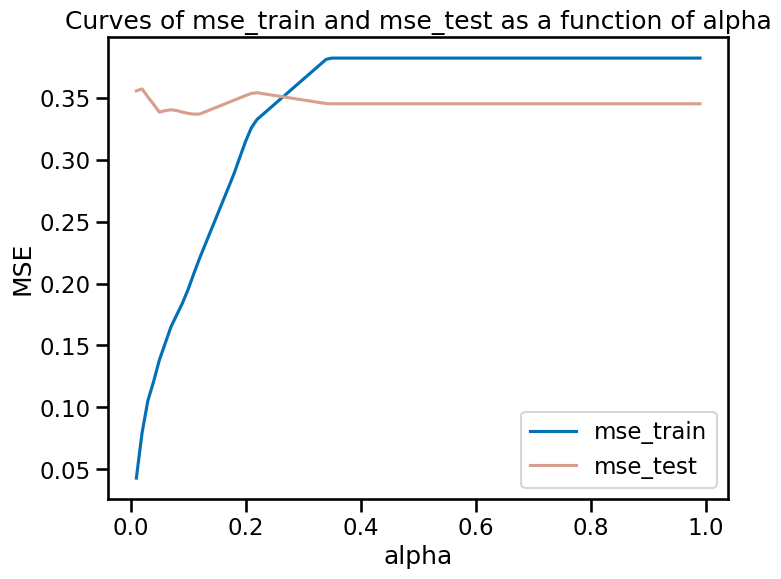

In [31]:
mse_values_train = []
mse_values_test = []
zero_features_count = []
non_zero_features_count = []

alphas = np.arange(0.01, 1, 0.01)

for a in alphas:
    lasso = Lasso(alpha = a )

    lasso.fit(X_1_train, y_1_train)

    y_pred_test = lasso.predict(X_1_test)
    y_pred_train = lasso.predict(X_1_train)

    mse_test = mean_absolute_error(y_1_test, y_pred_test)
    mse_train = mean_absolute_error(y_1_train, y_pred_train)

    mse_values_train.append(mse_train)
    mse_values_test.append(mse_test)

df_results = pd.DataFrame({
    'alpha': alphas,
    'mse_train': mse_values_train,
    'mse_test': mse_values_test
})  


plt.figure(figsize=(8, 6))

sns.lineplot(x='alpha', y='mse_train', data=df_results, label='mse_train', color='#0170B7')
sns.lineplot(x='alpha', y='mse_test', data=df_results, label='mse_test', color='#D7A08E')

plt.title('Curves of mse_train and mse_test as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()


plt.show()


#### Df_2

Random Search

In [32]:
param_grid = {'alpha': uniform(loc=0, scale=4)}

In [33]:
lasso = Lasso()
random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_grid, n_iter=100, random_state=42)
random_search.fit(X_2_train, y_2_train)

print("Meilleurs hyperparamètres:", random_search.best_params_)

Meilleurs hyperparamètres: {'alpha': 0.08233797718320979}


Grid search

In [34]:
alpha = np.arange(0, 4, 0.01)

In [35]:
lasso = Lasso()

param_grid = {
    'alpha': alpha,  
}

grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_2_train, y_2_train)

print("Best hyperparameters:", grid_search.best_params_)

lasso_best = grid_search.best_estimator_
predictions = lasso_best.predict(X_2_test)

mse = mean_absolute_error(y_2_test, predictions)
print("MSE on test data:", mse)

Best hyperparameters: {'alpha': 0.09}
MSE on test data: 0.5459409923171206


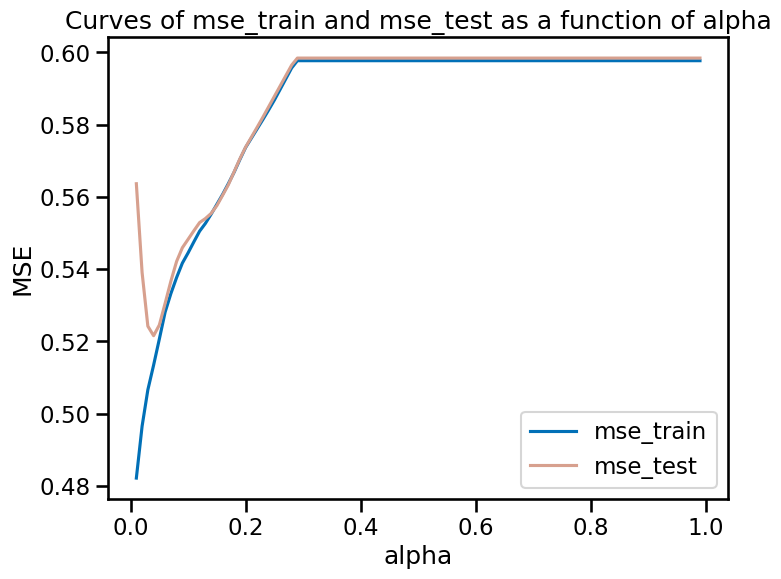

In [36]:
mse_values_train = []
mse_values_test = []
zero_features_count = []
non_zero_features_count = []

alphas = np.arange(0.01, 1, 0.01)

for a in alphas:
    lasso = Lasso(alpha = a )

    lasso.fit(X_2_train, y_2_train)

    y_pred_test = lasso.predict(X_2_test)
    y_pred_train = lasso.predict(X_2_train)

    mse_test = mean_absolute_error(y_2_test, y_pred_test)
    mse_train = mean_absolute_error(y_2_train, y_pred_train)

    mse_values_train.append(mse_train)
    mse_values_test.append(mse_test)

df_results = pd.DataFrame({
    'alpha': alphas,
    'mse_train': mse_values_train,
    'mse_test': mse_values_test
})  


plt.figure(figsize=(8, 6))

sns.lineplot(x='alpha', y='mse_train', data=df_results, label='mse_train', color='#0170B7')
sns.lineplot(x='alpha', y='mse_test', data=df_results, label='mse_test', color='#D7A08E')

plt.title('Curves of mse_train and mse_test as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()


plt.show()


#### Df_3

Random Search

In [37]:
param_grid = {'alpha': uniform(loc=0, scale=4)}

In [38]:
lasso = Lasso()
random_search = RandomizedSearchCV(estimator=lasso, param_distributions=param_grid, n_iter=100, random_state=42)
random_search.fit(X_3_train, y_3_train)

print("Meilleurs hyperparamètres:", random_search.best_params_)

Meilleurs hyperparamètres: {'alpha': 0.1858016508799909}


Grid search

In [39]:
alpha = np.arange(0, 4, 0.01)

In [40]:
lasso = Lasso()

param_grid = {
    'alpha': alpha,  
}

grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_3_train, y_3_train)

print("Best hyperparameters:", grid_search.best_params_)

lasso_best = grid_search.best_estimator_
predictions = lasso_best.predict(X_3_test)

mse = mean_absolute_error(y_3_test, predictions)
print("MSE on test data:", mse)

Best hyperparameters: {'alpha': 0.19}
MSE on test data: 0.5027801765657747


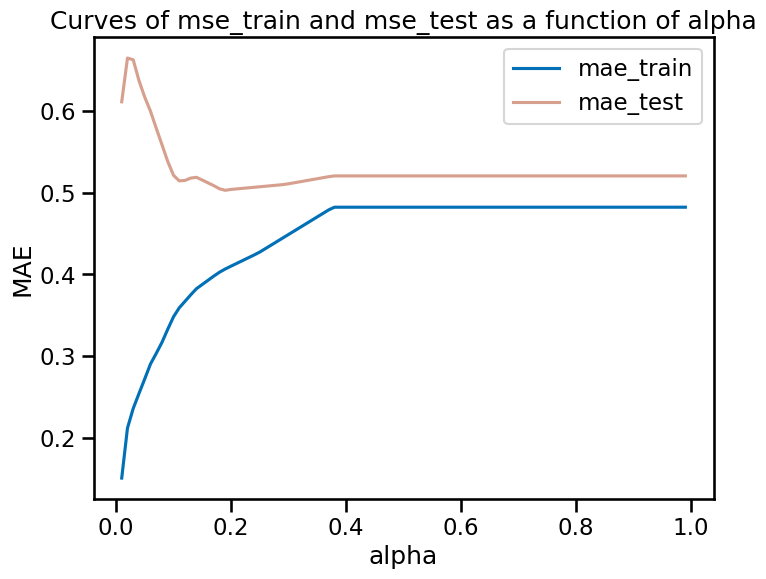

In [41]:
mse_values_train = []
mse_values_test = []
zero_features_count = []
non_zero_features_count = []

alphas = np.arange(0.01, 1, 0.01)

for a in alphas:
    lasso = Lasso(alpha = a )

    lasso.fit(X_3_train, y_3_train)

    y_pred_test = lasso.predict(X_3_test)
    y_pred_train = lasso.predict(X_3_train)

    mse_test = mean_absolute_error(y_3_test, y_pred_test)
    mse_train = mean_absolute_error(y_3_train, y_pred_train)

    mse_values_train.append(mse_train)
    mse_values_test.append(mse_test)

df_results = pd.DataFrame({
    'alpha': alphas,
    'mae_train': mse_values_train,
    'mae_test': mse_values_test
})  


plt.figure(figsize=(8, 6))

sns.lineplot(x='alpha', y='mae_train', data=df_results, label='mae_train', color='#0170B7')
sns.lineplot(x='alpha', y='mae_test', data=df_results, label='mae_test', color='#D7A08E')

plt.title('Curves of mse_train and mse_test as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.legend()


plt.show()


### Lasso Model

Now that we have the best possible alpha, we run our model to find the non-zero features. Here are the different alpha :
- 0.03
- 0.06
- 0.1

In [42]:
prediction_1 = []
prediction_2 = []
prediction_3 = []

### Define models

In [43]:
# DF 1
lasso_model_1 = Lasso(alpha=0.03, random_state=42) 
lasso_model_1.fit(X_1_train, y_1_train)
predictions_1 = lasso_model_1.predict(X_1_test)

# DF 2
lasso_model_2 = Lasso(alpha=0.06, random_state=42) 
lasso_model_2.fit(X_2_train, y_2_train)
predictions_2 = lasso_model_2.predict(X_2_test)

# DF 3
lasso_model_3 = Lasso(alpha=0.1, random_state=42) 
lasso_model_3.fit(X_3_train, y_3_train)
predictions_3 = lasso_model_3.predict(X_3_test)

In [44]:
mae_1 = mean_absolute_error(y_1_test, predictions_1)
mae_2 = mean_absolute_error(y_2_test, predictions_2)
mae_3 = mean_absolute_error(y_3_test, predictions_3)


print("MAE du DF 1:", mae_1)
print("MAE du DF 2:", mae_2)
print("MAE du DF 3:", mae_3)

MAE du DF 1: 0.3506477125166342
MAE du DF 2: 0.5305310268082803
MAE du DF 3: 0.5211796418782556


### Calculate errors

In [45]:
errors_1 = np.abs(y_1_test - predictions_1)
data_1 = {'errors': errors_1, 'value_test':y_1_test, 'predictions':predictions_1}
useful_1 = pd.DataFrame(data_1)
df_sorted_1 = useful_1.sort_values(by='errors', ascending=False)


errors_2 = np.abs(y_2_test - predictions_2)
data_2 = {'errors': errors_2, 'value_test':y_2_test, 'predictions':predictions_2}
useful_2 = pd.DataFrame(data_2)
df_sorted_2 = useful_2.sort_values(by='errors', ascending=False)


errors_3 = np.abs(y_3_test - predictions_3)
data_3 = {'errors': errors_3, 'value_test':y_3_test, 'predictions':predictions_3}
useful_3 = pd.DataFrame(data_3)
df_sorted_3 = useful_3.sort_values(by='errors', ascending=False)

### Graph

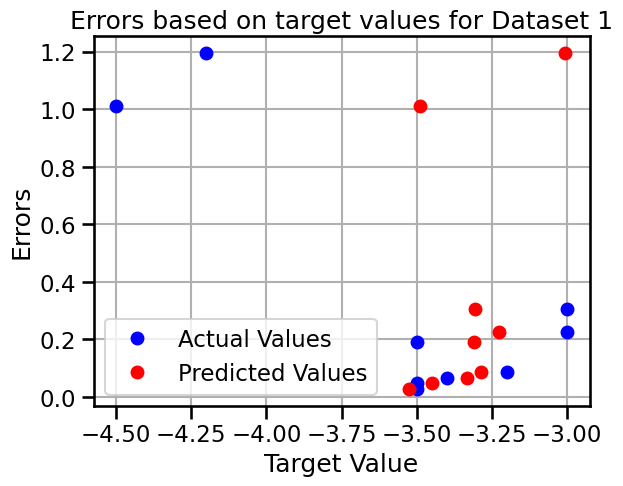

In [46]:
plt.plot(useful_1['value_test'], useful_1['errors'], marker='o', color='b', linestyle='', label='Actual Values')
plt.plot(useful_1['predictions'], useful_1['errors'], marker='o', color='r', linestyle='', label='Predicted Values')

plt.xlabel('Target Value')
plt.ylabel('Errors')
plt.title('Errors based on target values for Dataset 1')

plt.grid(True)
plt.legend()
plt.show()

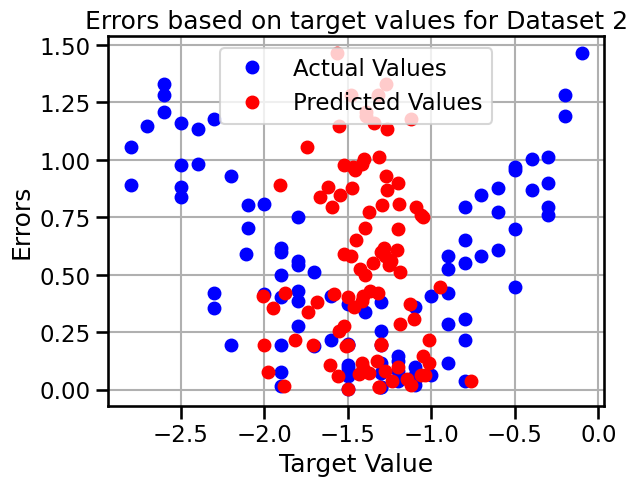

In [47]:
plt.plot(useful_2['value_test'], useful_2['errors'], marker='o', color='b', linestyle='', label='Actual Values')
plt.plot(useful_2['predictions'], useful_2['errors'], marker='o', color='r', linestyle='', label='Predicted Values')

plt.xlabel('Target Value')
plt.ylabel('Errors')
plt.title('Errors based on target values for Dataset 2')

plt.grid(True)
plt.legend()
plt.show()

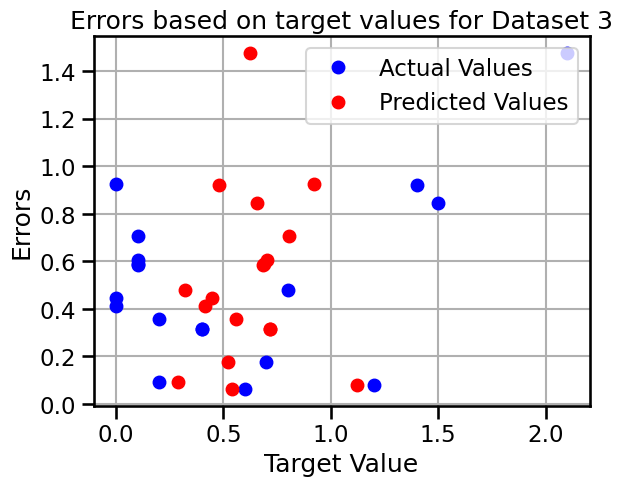

In [48]:
plt.plot(useful_3['value_test'], useful_3['errors'], marker='o', color='b', linestyle='', label='Actual Values')
plt.plot(useful_3['predictions'], useful_3['errors'], marker='o', color='r', linestyle='', label='Predicted Values')

plt.xlabel('Target Value')
plt.ylabel('Errors')
plt.title('Errors based on target values for Dataset 3')

plt.grid(True)
plt.legend()
plt.show()

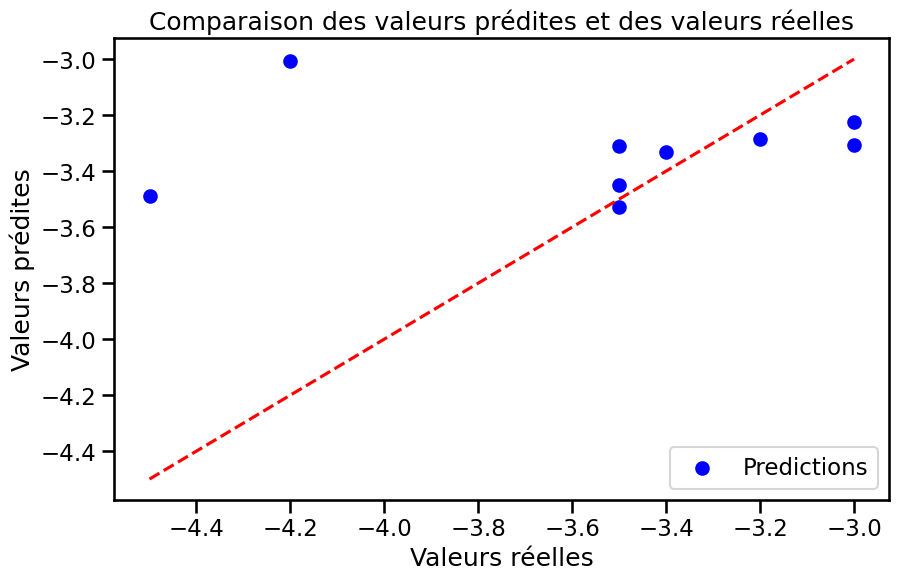

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_1_test, predictions_1, color='blue', label='Predictions')
plt.plot([y_1_test.min(), y_1_test.max()], [y_1_test.min(), y_1_test.max()], color='red', linestyle='--')
plt.title('Comparaison des valeurs prédites et des valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()

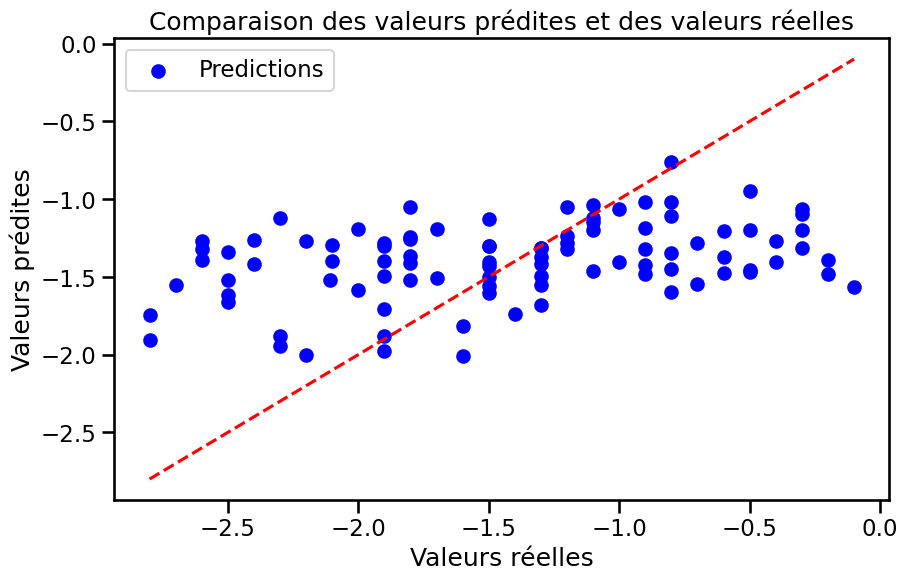

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(y_2_test, predictions_2, color='blue', label='Predictions')
plt.plot([y_2_test.min(), y_2_test.max()], [y_2_test.min(), y_2_test.max()], color='red', linestyle='--')
plt.title('Comparaison des valeurs prédites et des valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()

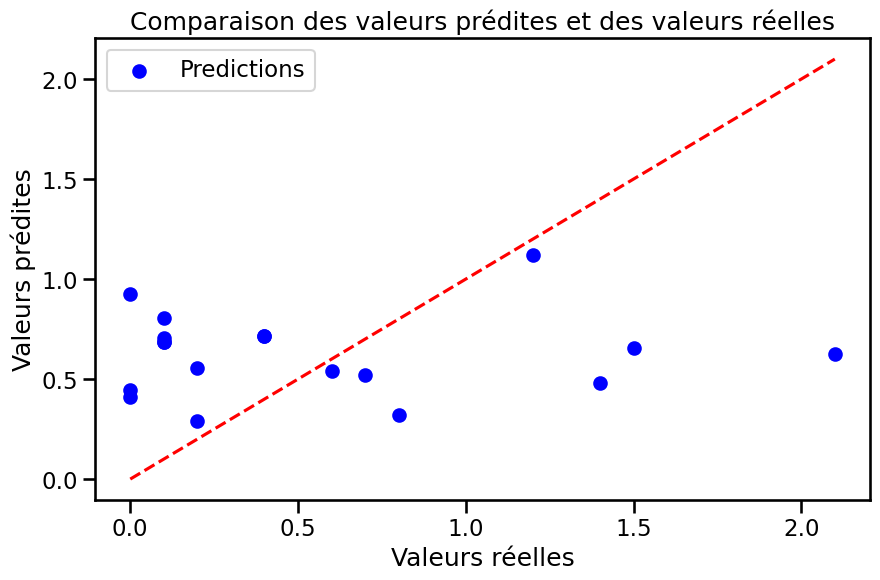

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(y_3_test, predictions_3, color='blue', label='Predictions')
plt.plot([y_3_test.min(), y_3_test.max()], [y_3_test.min(), y_3_test.max()], color='red', linestyle='--')
plt.title('Comparaison des valeurs prédites et des valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()

#### Find important features

In [52]:
lasso_coefs_1 = lasso_model_1.coef_

lasso_coefs_df_1 = pd.DataFrame({
    'Feature': X_1.columns,
    'Coefficient': lasso_coefs_1
})

lasso_coefs_df_1['AbsoluteCoefficient'] = abs(lasso_coefs_df_1['Coefficient'])
lasso_coefs_df_1 = lasso_coefs_df_1.sort_values(by='AbsoluteCoefficient', ascending=False)

In [53]:
lasso_coefs_2 = lasso_model_2.coef_

lasso_coefs_df_2 = pd.DataFrame({
    'Feature': X_2.columns,
    'Coefficient': lasso_coefs_2
})

lasso_coefs_df_2['AbsoluteCoefficient'] = abs(lasso_coefs_df_2['Coefficient'])
lasso_coefs_df_2 = lasso_coefs_df_2.sort_values(by='AbsoluteCoefficient', ascending=False)

In [54]:
lasso_coefs_3 = lasso_model_3.coef_

lasso_coefs_df_3 = pd.DataFrame({
    'Feature': X_3.columns,
    'Coefficient': lasso_coefs_3
})

lasso_coefs_df_3['AbsoluteCoefficient'] = abs(lasso_coefs_df_3['Coefficient'])
lasso_coefs_df_3 = lasso_coefs_df_3.sort_values(by='AbsoluteCoefficient', ascending=False)

### Creation of new features

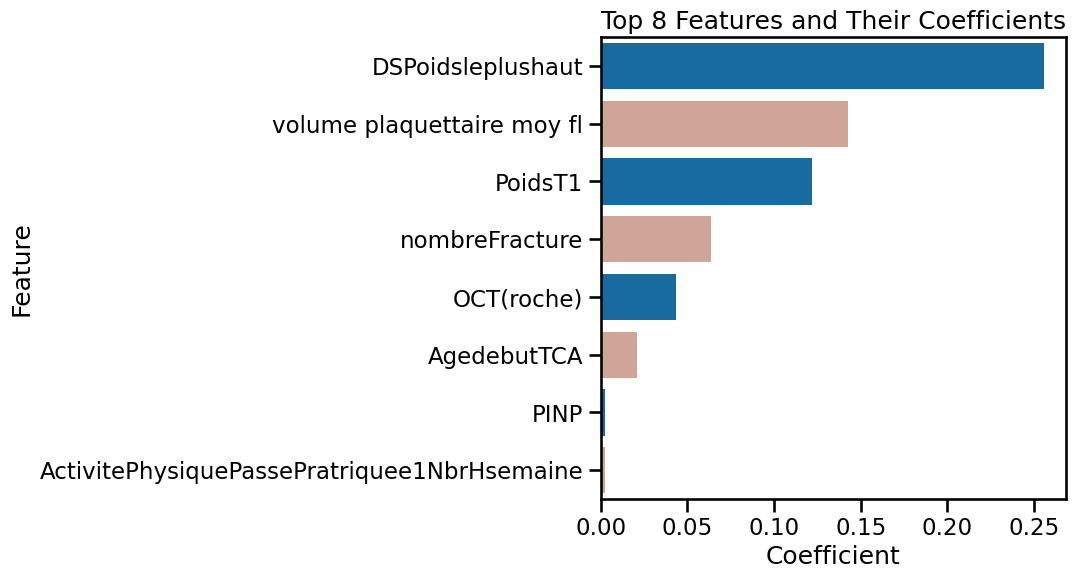

In [55]:
liste_features_15_1 = list(lasso_coefs_df_1['Feature'].head(8))
coefficients_15_1 = list(lasso_coefs_df_1['AbsoluteCoefficient'].head(8))

plt.figure(figsize=(6, 6))
sns.barplot(x=coefficients_15_1, y=liste_features_15_1, palette=["#0170B7", "#D7A08E"])
plt.title('Top 8 Features and Their Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

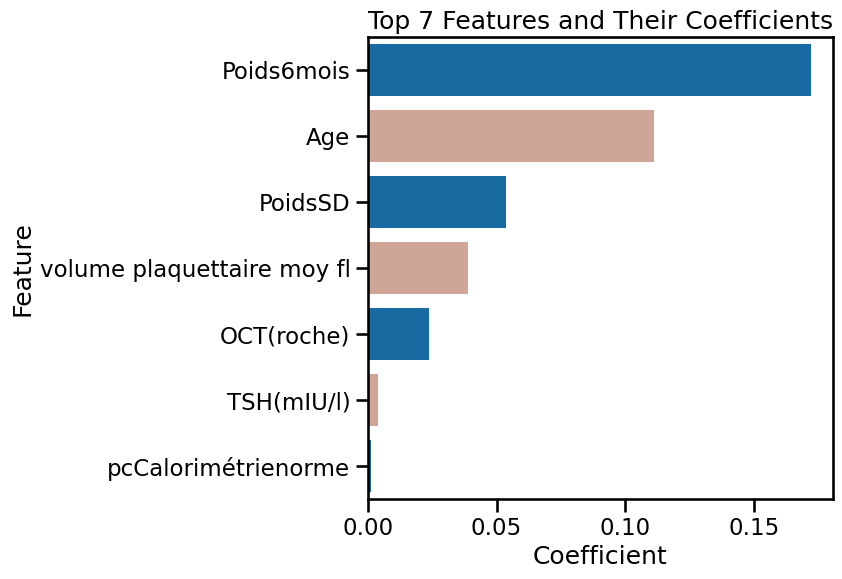

In [56]:
liste_features_15_2 = list(lasso_coefs_df_2['Feature'].head(7))
coefficients_15_2 = list(lasso_coefs_df_2['AbsoluteCoefficient'].head(7))

plt.figure(figsize=(6, 6))
sns.barplot(x=coefficients_15_2, y=liste_features_15_2, palette=["#0170B7", "#D7A08E"])
plt.title('Top 7 Features and Their Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

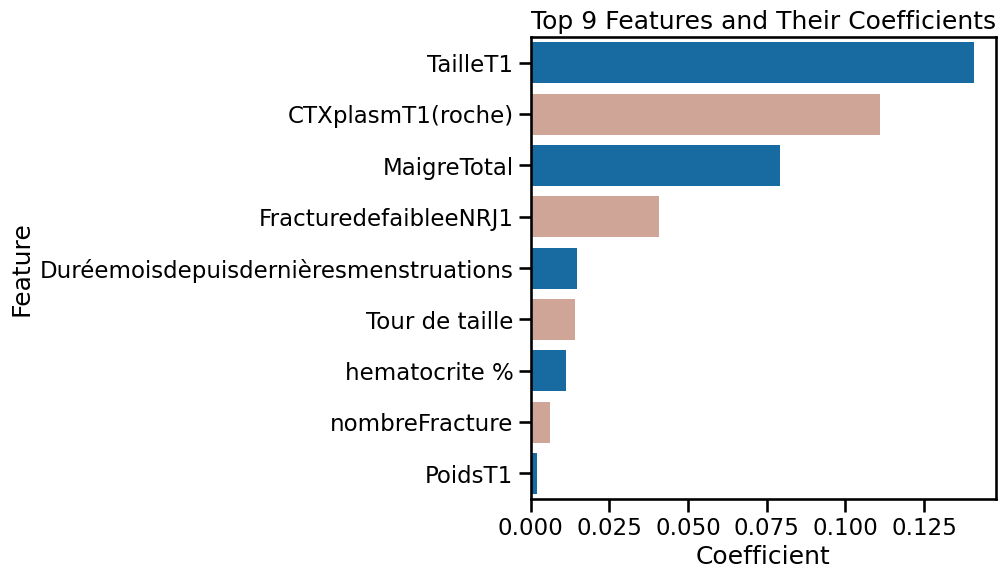

In [57]:
liste_features_15_3 = list(lasso_coefs_df_3['Feature'].head(9))
coefficients_15_3 = list(lasso_coefs_df_3['AbsoluteCoefficient'].head(9))

plt.figure(figsize=(6, 6))
sns.barplot(x=coefficients_15_3, y=liste_features_15_3, palette=["#0170B7", "#D7A08E"])
plt.title('Top 9 Features and Their Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [58]:
df_1 = df_1[liste_features_15_1 + ['L1L4ZscoreSD']]
df_2 = df_2[liste_features_15_2 + ['L1L4ZscoreSD']]
df_3 = df_3[liste_features_15_3 + ['L1L4ZscoreSD']]

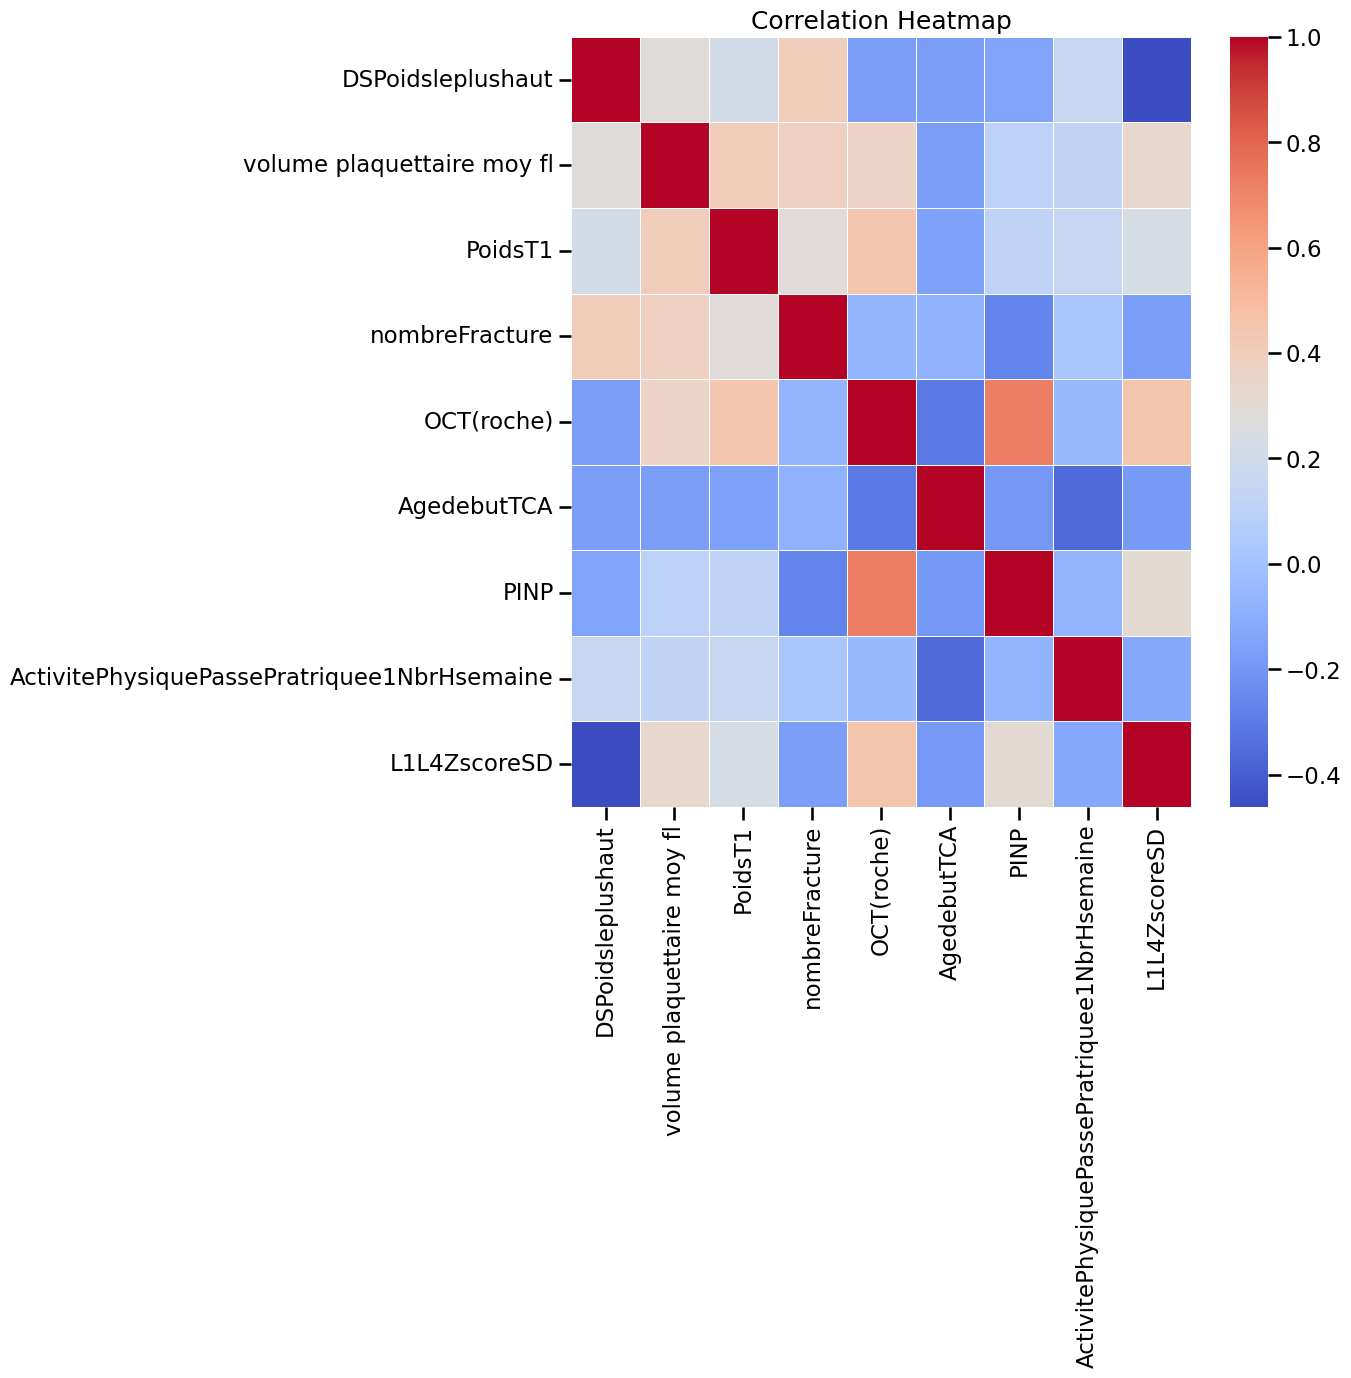

In [59]:
correlation_matrix_1 = df_1.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_1, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

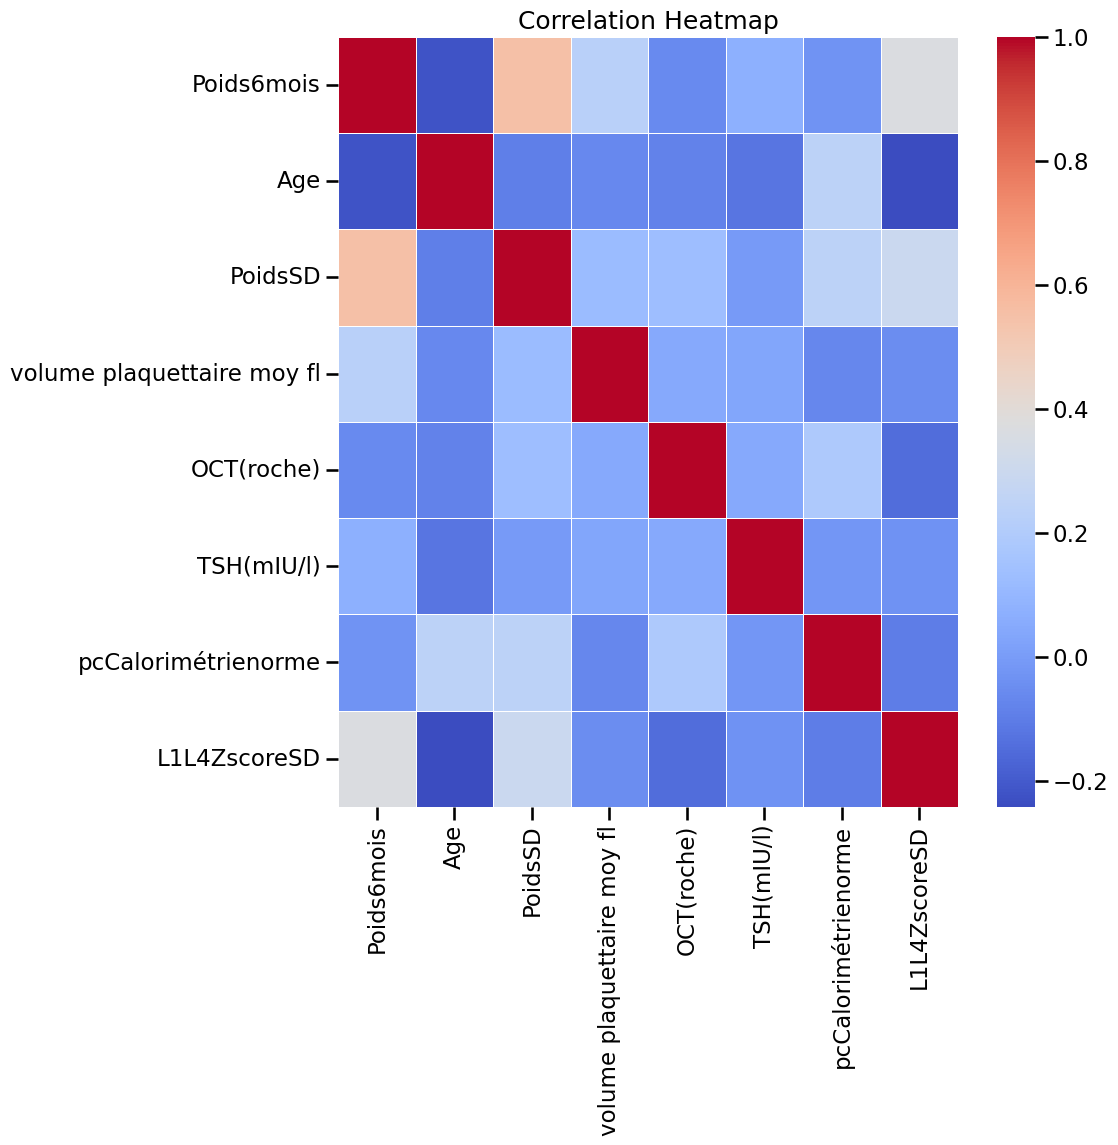

In [60]:
correlation_matrix_2 = df_2.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_2, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

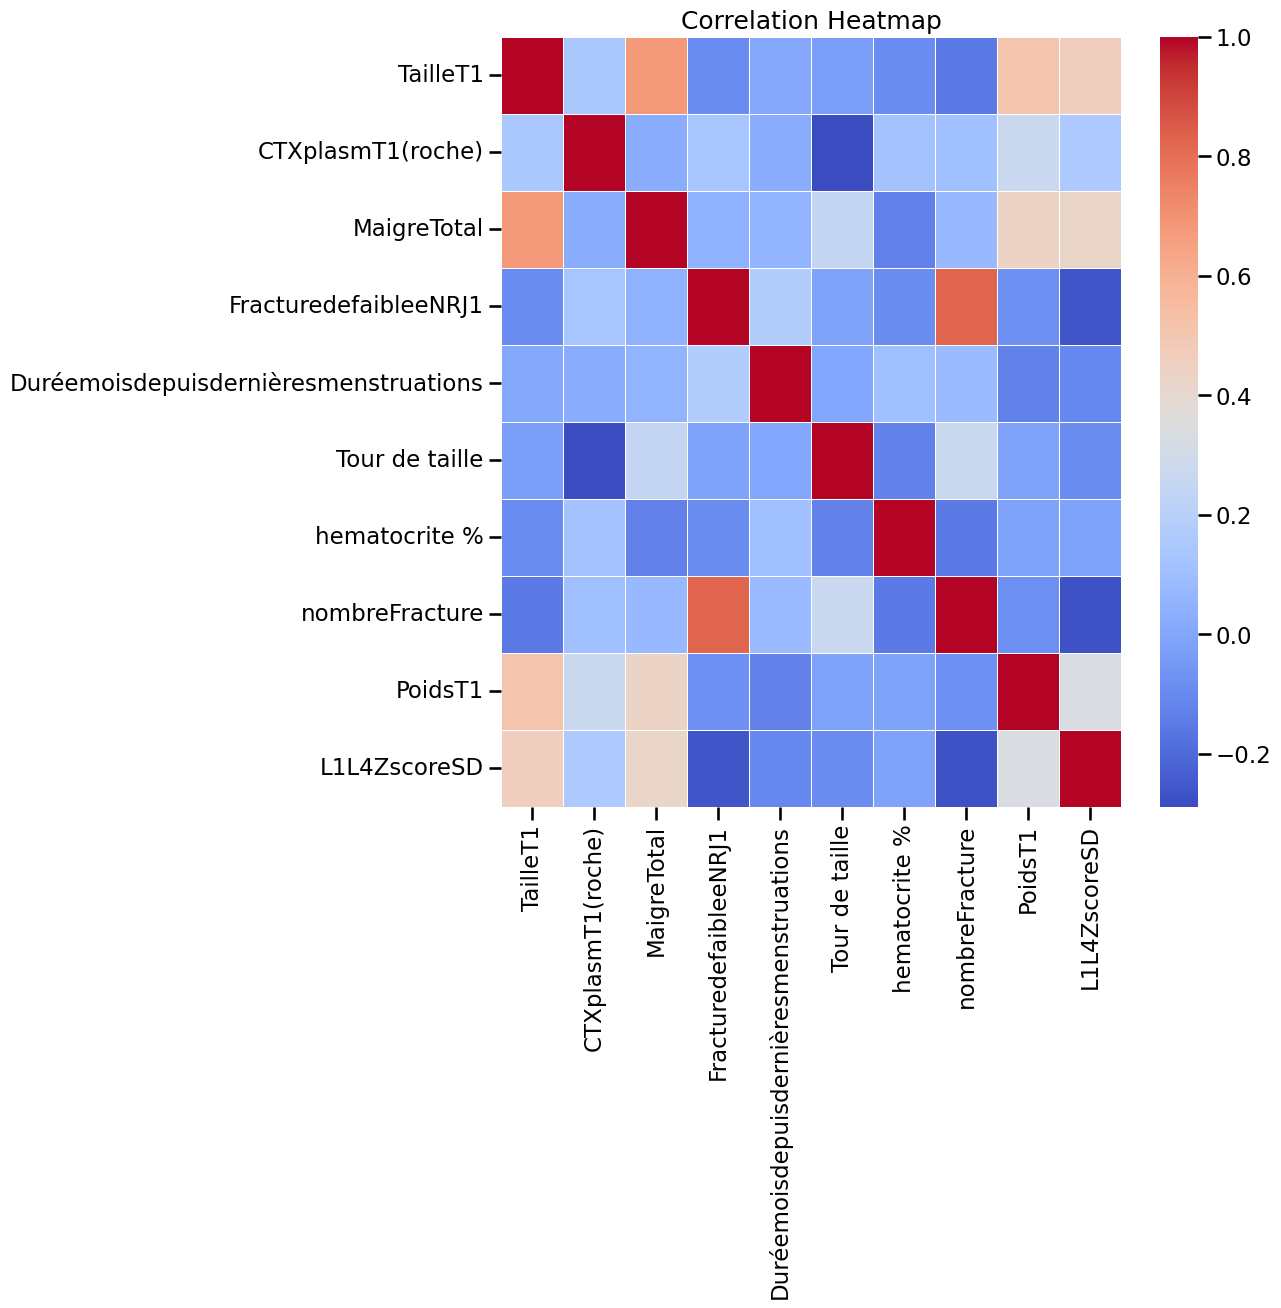

In [61]:
correlation_matrix_3 = df_3.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_3, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Lasso Test on top 10 important features

#### Df 1

In [62]:
X_1 = df_1.drop(columns=['L1L4ZscoreSD'])
y_1 = df_1[target]

scaler = StandardScaler()

X_1 = pd.DataFrame(scaler.fit_transform(X_1), columns=X_1.columns)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [63]:
lasso = Lasso()

param_grid = {
    'alpha': alpha,  
}

grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_1_train, y_1_train)

print("Best hyperparameters:", grid_search.best_params_)

lasso_best = grid_search.best_estimator_
predictions = lasso_best.predict(X_1_test)

mae_1 = mean_absolute_error(y_1_test, predictions)
print("MAE on test data:", mae_1)

Best hyperparameters: {'alpha': 0.05}
MAE on test data: 0.3089424760482426


#### Df 2

In [64]:
X_2 = df_2.drop(columns=['L1L4ZscoreSD'])
y_2 = df_2[target]

scaler = StandardScaler()

X_2 = pd.DataFrame(scaler.fit_transform(X_2), columns=X_2.columns)
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

In [65]:
lasso = Lasso()

param_grid = {
    'alpha': alpha,  
}

grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_2_train, y_2_train)

print("Best hyperparameters:", grid_search.best_params_)

lasso_best = grid_search.best_estimator_
predictions = lasso_best.predict(X_2_test)

mae_2 = mean_absolute_error(y_2_test, predictions)
print("MAE on test data:", mae_2)

Best hyperparameters: {'alpha': 0.0}
MAE on test data: 0.5361365908719924


#### Df 3

In [66]:
X_3 = df_3.drop(columns=['L1L4ZscoreSD'])
y_3 = df_3[target]

scaler = StandardScaler()

X_3 = pd.DataFrame(scaler.fit_transform(X_3), columns=X_3.columns)
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)


In [67]:
lasso = Lasso()

param_grid = {
    'alpha': alpha,  
}

grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_3_train, y_3_train)

print("Best hyperparameters:", grid_search.best_params_)

lasso_best = grid_search.best_estimator_
predictions = lasso_best.predict(X_3_test)

mae_3 = mean_absolute_error(y_3_test, predictions)
print("MAE on test data:", mae_3)

Best hyperparameters: {'alpha': 0.01}
MAE on test data: 0.6211043976468148


## SVR

In [68]:
mae_values_train_1 = []
mae_values_test_1 = []
zero_features_count_1 = []
non_zero_features_count_1 = []

#### Dataframe 1

In [69]:
constraint = np.arange(0.01, 5, 0.01)

for C in constraint:
    svm_regressor = SVR(kernel='rbf', tol=0.0001, C=C, epsilon=0.2)

    svm_regressor.fit(X_1_train, y_1_train)

    y_pred_test = svm_regressor.predict(X_1_test)
    y_pred_train = svm_regressor.predict(X_1_train)

    mae_test = mean_absolute_error(y_1_test, y_pred_test)
    mae_train = mean_absolute_error(y_1_train, y_pred_train)

    mae_values_train_1.append(mae_train)
    mae_values_test_1.append(mse_test)  

In [70]:
df_results_1 = pd.DataFrame({
    'C': constraint,
    'mae_train': mae_values_train_1,
    'mae_test': mae_values_test_1
})

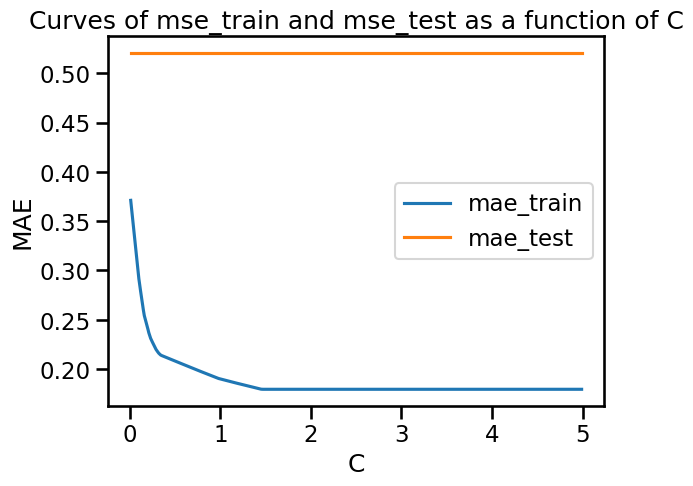

In [71]:
plt.plot(df_results_1['C'], df_results_1['mae_train'], label='mae_train')
plt.plot(df_results_1['C'], df_results_1['mae_test'], label='mae_test')

# Ajouter des titres et une légende
plt.title('Curves of mse_train and mse_test as a function of C')
plt.xlabel('C')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [72]:
param_grid = {
    'C': np.arange(0.01, 5, 0.01),
    'kernel': ['rbf'],  
        'epsilon' : [0.2]
}

svm_regressor = SVR()
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

random_search = GridSearchCV(svm_regressor, param_grid=param_grid, scoring=mae_scorer, cv=5)
random_search.fit(X_1_train, y_1_train)

best_C = random_search.best_params_['C']
best_kernel = random_search.best_params_['kernel']


best_svm_regressor = SVR(kernel='rbf', tol=0.0001, C=best_C, epsilon=0.2)
best_svm_regressor.fit(X_1_train, y_1_train)

y_pred_test = best_svm_regressor.predict(X_1_test)
y_pred_train = best_svm_regressor.predict(X_1_train)

mae_test_best_svm = mean_absolute_error(y_1_test, y_pred_test)
mae_train_best_svm = mean_absolute_error(y_1_train, y_pred_train)

print(f"Best C value: {best_C}, Best kernel: {best_kernel}")
print(f"Mean Absolute Error on Test Set: {mae_test_best_svm}")
print(f"Mean Absolute Error on Training Set: {mae_train_best_svm}")

Best C value: 0.4, Best kernel: rbf
Mean Absolute Error on Test Set: 0.26402959663871123
Mean Absolute Error on Training Set: 0.21184964137209347


In [73]:
# Calculate errors
errors_test_svm = np.abs(y_1_test - y_pred_test)
errors_train_svm = np.abs(y_1_train - y_pred_train)

data_svm_train = {'errors_train': errors_train_svm, 'value_train' : y_1_train, 'predictions_train' :y_pred_train}
useful_svm_train_1 = pd.DataFrame(data_svm_train)


data_svm_test = {'errors_test': errors_test_svm, 'value_test':y_1_test, 'predictions':y_pred_test}
useful_svm_test_1 = pd.DataFrame(data_svm_test)

df_sorted_svm_est_1 = useful_svm_test_1.sort_values(by='errors_test', ascending=False)

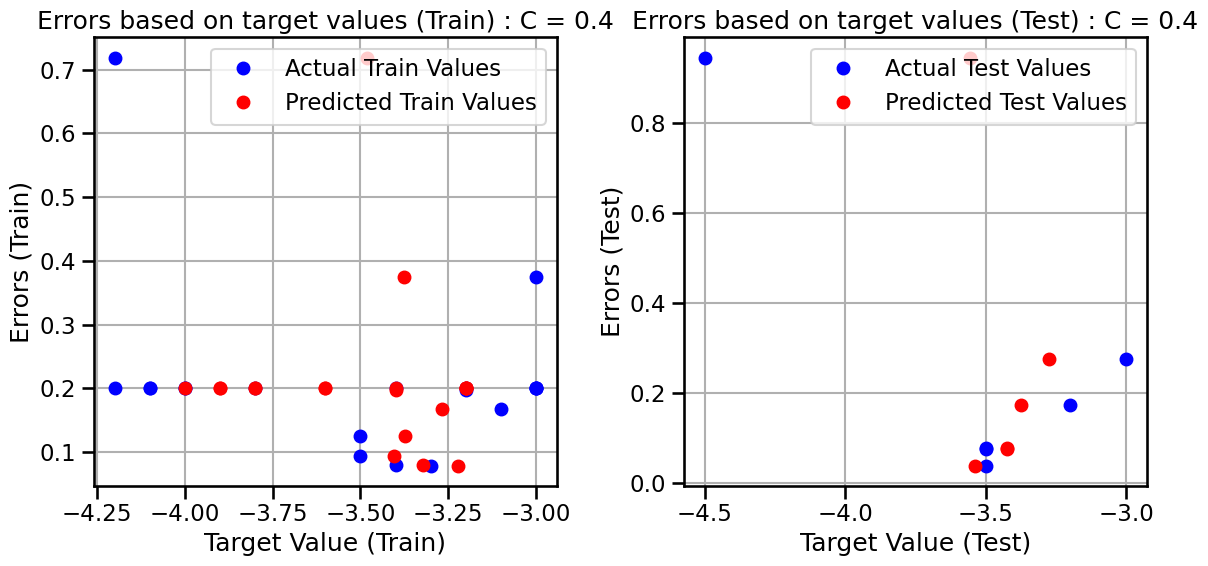

In [74]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left : train
axs[0].plot(useful_svm_train_1['value_train'], useful_svm_train_1['errors_train'], marker='o', color='b', linestyle='', label='Actual Train Values')
axs[0].plot(useful_svm_train_1['predictions_train'], useful_svm_train_1['errors_train'], marker='o', color='r', linestyle='', label='Predicted Train Values')
axs[0].set_xlabel('Target Value (Train)')
axs[0].set_ylabel('Errors (Train)')
axs[0].set_title(f'Errors based on target values (Train) : C = {best_C}')
axs[0].grid(True)
axs[0].legend()

# Right : test
axs[1].plot(useful_svm_test_1['value_test'], useful_svm_test_1['errors_test'], marker='o', color='b', linestyle='', label='Actual Test Values')
axs[1].plot(useful_svm_test_1['predictions'], useful_svm_test_1['errors_test'], marker='o', color='r', linestyle='', label='Predicted Test Values')
axs[1].set_xlabel('Target Value (Test)')
axs[1].set_ylabel('Errors (Test)')
axs[1].set_title(f'Errors based on target values (Test) : C = {best_C}')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()

# Afficher les graphiques
plt.show()

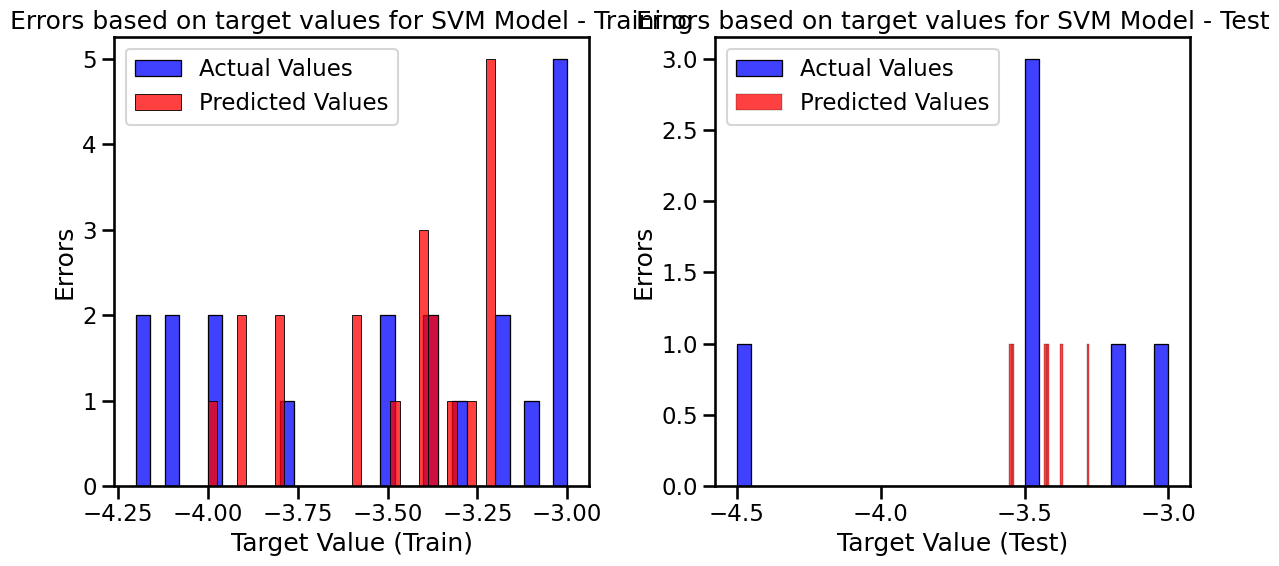

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left Histogram : Train
sns.histplot(x='value_train', data=useful_svm_train_1, color='b', linestyle='-', label='Actual Values', bins=30, ax=axs[0])
sns.histplot(x='predictions_train', data=useful_svm_train_1, color='r', linestyle='-', label='Predicted Values', bins=30, ax=axs[0])
axs[0].set_xlabel('Target Value (Train)')
axs[0].set_ylabel('Errors')
axs[0].set_title('Errors based on target values for SVM Model - Training')
axs[0].legend()

# Right Histogram : Test
sns.histplot(x='value_test', data=useful_svm_test_1, color='b', linestyle='-', label='Actual Values', bins=30, ax=axs[1])
sns.histplot(x='predictions', data=useful_svm_test_1, color='r', linestyle='-', label='Predicted Values', bins=30, ax=axs[1])
axs[1].set_xlabel('Target Value (Test)')
axs[1].set_ylabel('Errors')
axs[1].set_title('Errors based on target values for SVM Model - Test')
axs[1].legend()

plt.tight_layout()

plt.show()

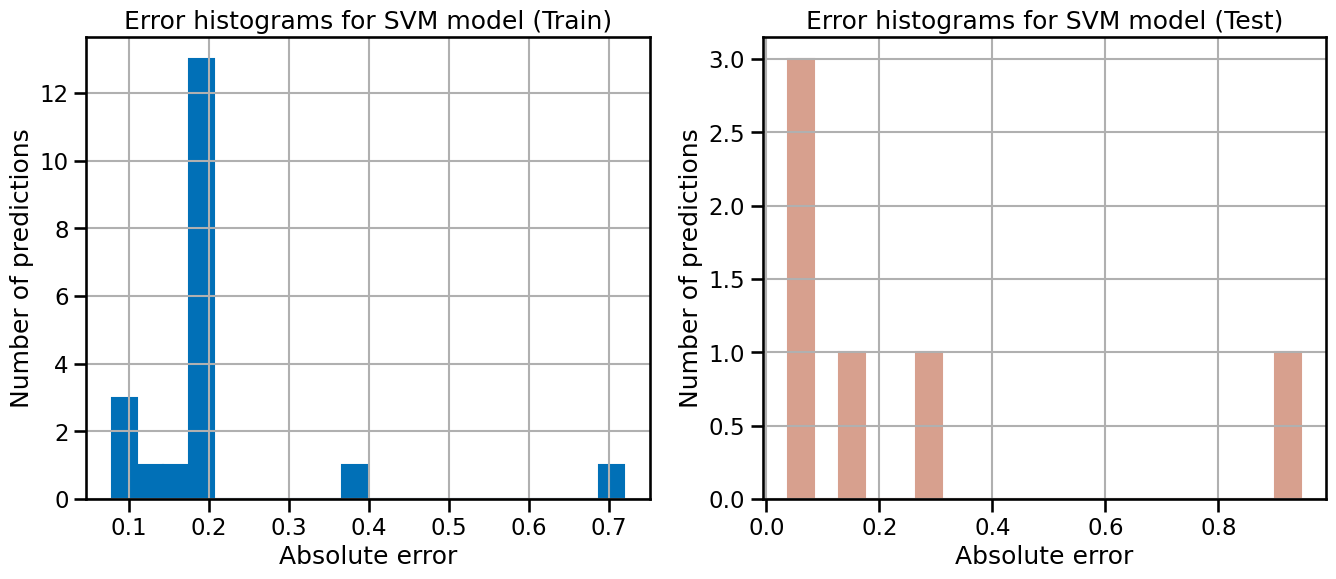

In [76]:
plt.figure(figsize=(16, 6))

# Left : train
plt.subplot(1, 2, 1)
plt.hist(errors_train_svm, bins=20, color='#0170B7', edgecolor='#0170B7')
plt.title('Error histograms for SVM model (Train)')
plt.xlabel('Absolute error')
plt.ylabel('Number of predictions')
plt.grid(True)


# Right : test
plt.subplot(1, 2, 2)
plt.hist(errors_test_svm, bins=20, color='#D7A08E', edgecolor='#D7A08E')
plt.title('Error histograms for SVM model (Test)')
plt.xlabel('Absolute error')
plt.ylabel('Number of predictions')
plt.grid(True)

plt.show()

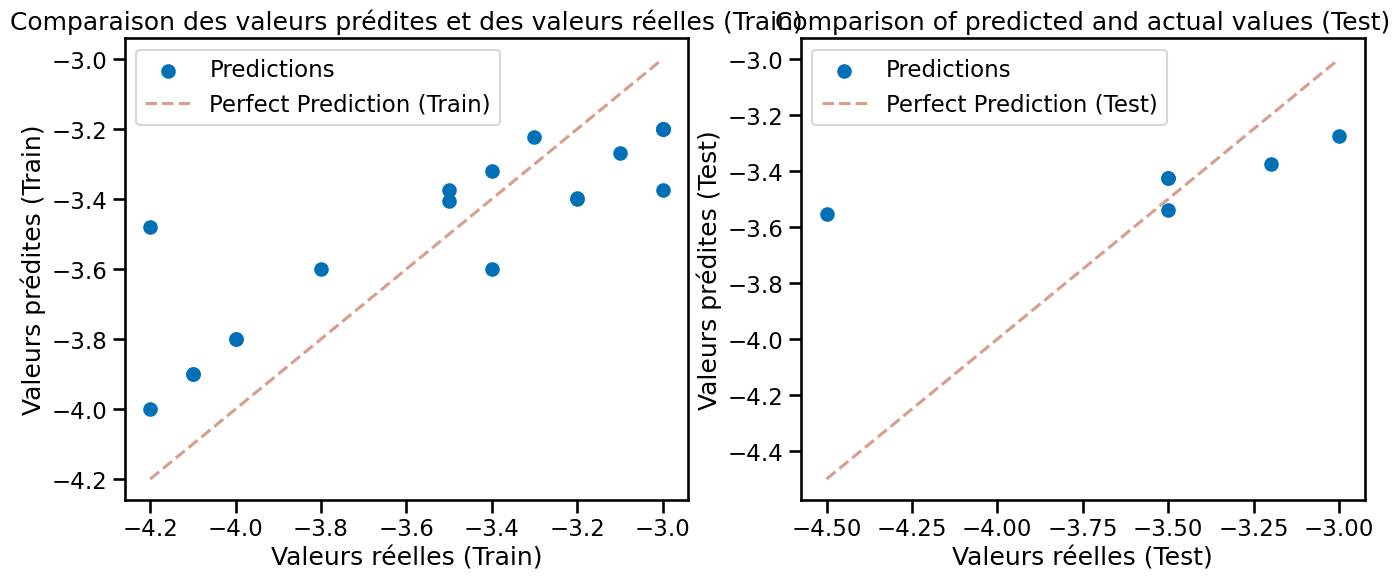

In [77]:
plt.figure(figsize=(16, 6))

# Left : Train
plt.subplot(1, 2, 1)
plt.scatter(y_1_train, y_pred_train, color='#0170B7', label='Predictions')
plt.plot([y_1_train.min(), y_1_train.max()], [y_1_train.min(), y_1_train.max()], color='#D7A08E', linestyle='--', label='Perfect Prediction (Train)')
plt.title('Comparaison des valeurs prédites et des valeurs réelles (Train)')
plt.xlabel('Valeurs réelles (Train)')
plt.ylabel('Valeurs prédites (Train)')
plt.legend()

# Right : test
plt.subplot(1, 2, 2)
plt.scatter(y_1_test, y_pred_test, color='#0170B7', label='Predictions')
plt.plot([y_1_test.min(), y_1_test.max()], [y_1_test.min(), y_1_test.max()], color="#D7A08E", linestyle='--', label='Perfect Prediction (Test)')
plt.title('Comparison of predicted and actual values (Test)')
plt.xlabel('Valeurs réelles (Test)')
plt.ylabel('Valeurs prédites (Test)')
plt.legend()

plt.show()

### Dataframe 2

In [78]:
mae_values_train_2 = []
mae_values_test_2 = []
zero_features_count_2 = []
non_zero_features_count_2 = []

In [79]:
constraint = np.arange(0.01, 100, 0.1)

for C in constraint:
    svm_regressor = SVR(kernel='rbf', tol=0.0001, C=C, epsilon=0.2)

    svm_regressor.fit(X_2_train, y_2_train)

    y_pred_test = svm_regressor.predict(X_2_test)
    y_pred_train = svm_regressor.predict(X_2_train)

    mae_test = mean_absolute_error(y_2_test, y_pred_test)
    mae_train = mean_absolute_error(y_2_train, y_pred_train)

    mae_values_train_2.append(mae_train)
    mae_values_test_2.append(mse_test)  

In [80]:
df_results_2 = pd.DataFrame({
    'C': constraint,
    'mae_train': mae_values_train_2,
    'mae_test': mae_values_test_2
})

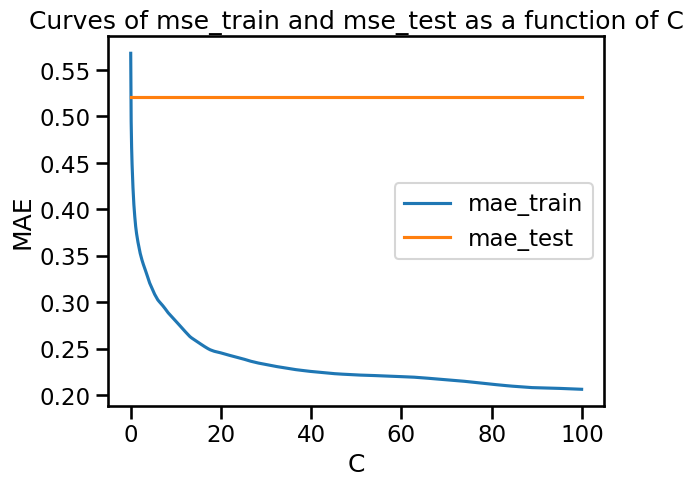

In [81]:
plt.plot(df_results_2['C'], df_results_2['mae_train'], label='mae_train')
plt.plot(df_results_2['C'], df_results_2['mae_test'], label='mae_test')

# Ajouter des titres et une légende
plt.title('Curves of mse_train and mse_test as a function of C')
plt.xlabel('C')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [82]:
param_grid = {
    'C': np.arange(0.01, 40, 0.01),
    'kernel': ['rbf'],  
        'epsilon' : [0.3]
}

svm_regressor = SVR()
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

random_search = GridSearchCV(svm_regressor, param_grid=param_grid, scoring=mae_scorer, cv=5)
random_search.fit(X_2_train, y_2_train)

best_C = random_search.best_params_['C']
best_kernel = random_search.best_params_['kernel']


best_svm_regressor = SVR(kernel='rbf', tol=0.0001, C=best_C, epsilon=0.3)
best_svm_regressor.fit(X_2_train, y_2_train)

y_pred_test = best_svm_regressor.predict(X_2_test)
y_pred_train = best_svm_regressor.predict(X_2_train)

mae_test_best_svm = mean_absolute_error(y_2_test, y_pred_test)
mae_train_best_svm = mean_absolute_error(y_2_train, y_pred_train)

print(f"Best C value: {best_C}, Best kernel: {best_kernel}")
print(f"Mean Absolute Error on Test Set: {mae_test_best_svm}")
print(f"Mean Absolute Error on Training Set: {mae_train_best_svm}")

Best C value: 0.22, Best kernel: rbf
Mean Absolute Error on Test Set: 0.5559839605895212
Mean Absolute Error on Training Set: 0.4753199879439264


In [83]:
# Calculate errors
errors_test_svm = np.abs(y_2_test - y_pred_test)
errors_train_svm = np.abs(y_2_train - y_pred_train)

data_svm_train = {'errors_train': errors_train_svm, 'value_train' : y_2_train, 'predictions_train' :y_pred_train}
useful_svm_train_2 = pd.DataFrame(data_svm_train)


data_svm_test = {'errors_test': errors_test_svm, 'value_test':y_2_test, 'predictions':y_pred_test}
useful_svm_test_2 = pd.DataFrame(data_svm_test)

df_sorted_svm_est_2 = useful_svm_test_2.sort_values(by='errors_test', ascending=False)

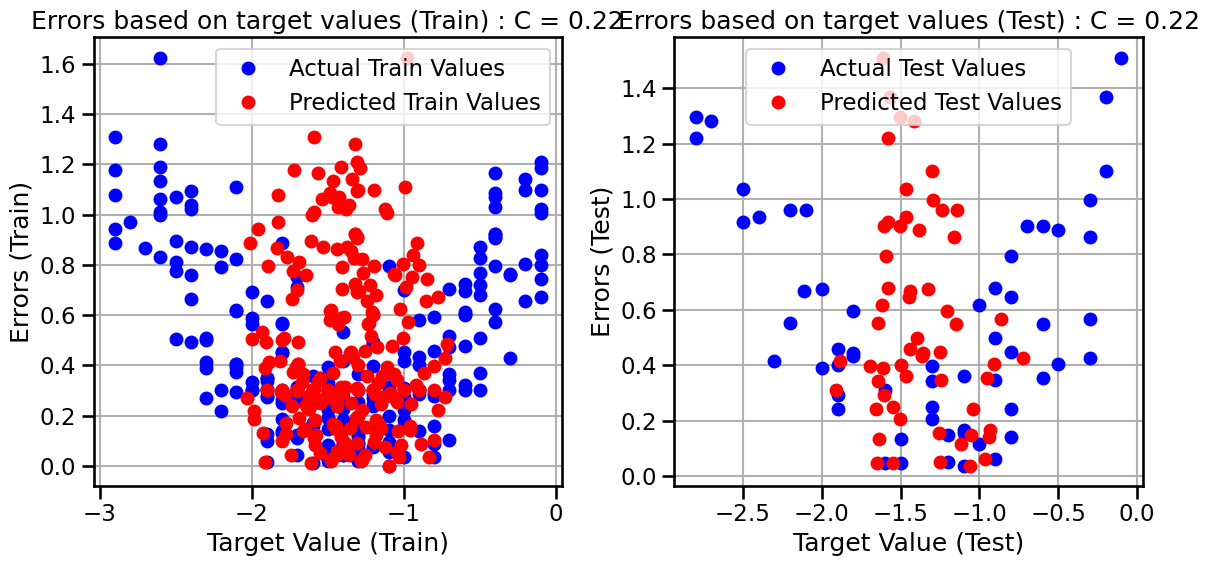

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left : train
axs[0].plot(useful_svm_train_2['value_train'], useful_svm_train_2['errors_train'], marker='o', color='b', linestyle='', label='Actual Train Values')
axs[0].plot(useful_svm_train_2['predictions_train'], useful_svm_train_2['errors_train'], marker='o', color='r', linestyle='', label='Predicted Train Values')
axs[0].set_xlabel('Target Value (Train)')
axs[0].set_ylabel('Errors (Train)')
axs[0].set_title(f'Errors based on target values (Train) : C = {best_C}')
axs[0].grid(True)
axs[0].legend()

# Right : test
axs[1].plot(useful_svm_test_2['value_test'], useful_svm_test_2['errors_test'], marker='o', color='b', linestyle='', label='Actual Test Values')
axs[1].plot(useful_svm_test_2['predictions'], useful_svm_test_2['errors_test'], marker='o', color='r', linestyle='', label='Predicted Test Values')
axs[1].set_xlabel('Target Value (Test)')
axs[1].set_ylabel('Errors (Test)')
axs[1].set_title(f'Errors based on target values (Test) : C = {best_C}')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()

# Afficher les graphiques
plt.show()

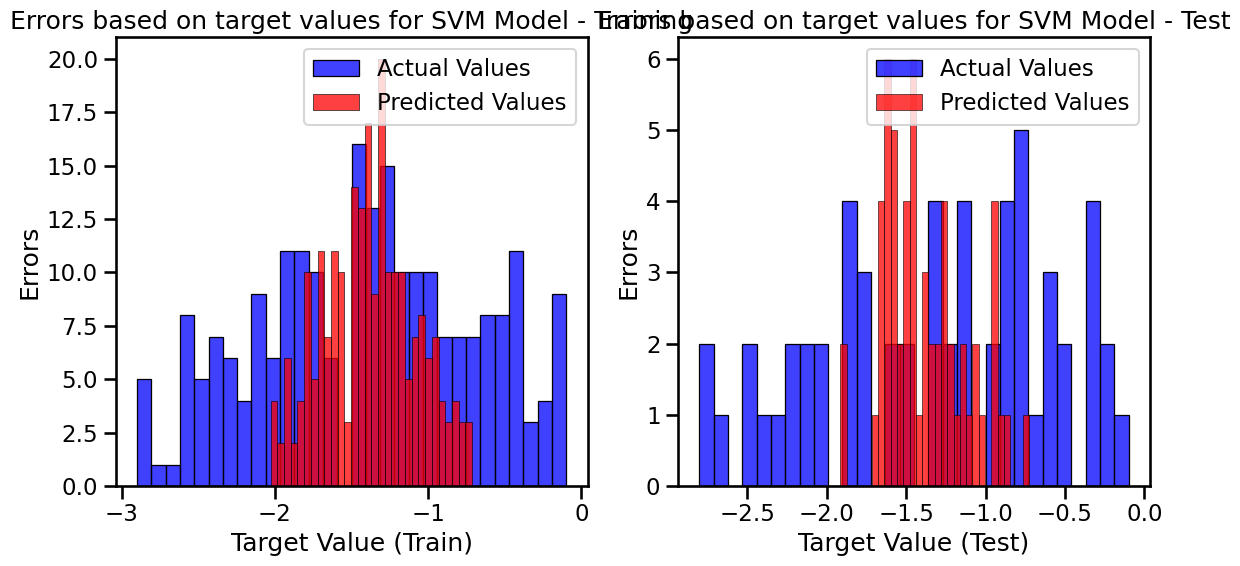

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left Histogram : Train
sns.histplot(x='value_train', data=useful_svm_train_2, color='b', linestyle='-', label='Actual Values', bins=30, ax=axs[0])
sns.histplot(x='predictions_train', data=useful_svm_train_2, color='r', linestyle='-', label='Predicted Values', bins=30, ax=axs[0])
axs[0].set_xlabel('Target Value (Train)')
axs[0].set_ylabel('Errors')
axs[0].set_title('Errors based on target values for SVM Model - Training')
axs[0].legend()

# Right Histogram : Test
sns.histplot(x='value_test', data=useful_svm_test_2, color='b', linestyle='-', label='Actual Values', bins=30, ax=axs[1])
sns.histplot(x='predictions', data=useful_svm_test_2, color='r', linestyle='-', label='Predicted Values', bins=30, ax=axs[1])
axs[1].set_xlabel('Target Value (Test)')
axs[1].set_ylabel('Errors')
axs[1].set_title('Errors based on target values for SVM Model - Test')
axs[1].legend()

plt.tight_layout()

plt.show()

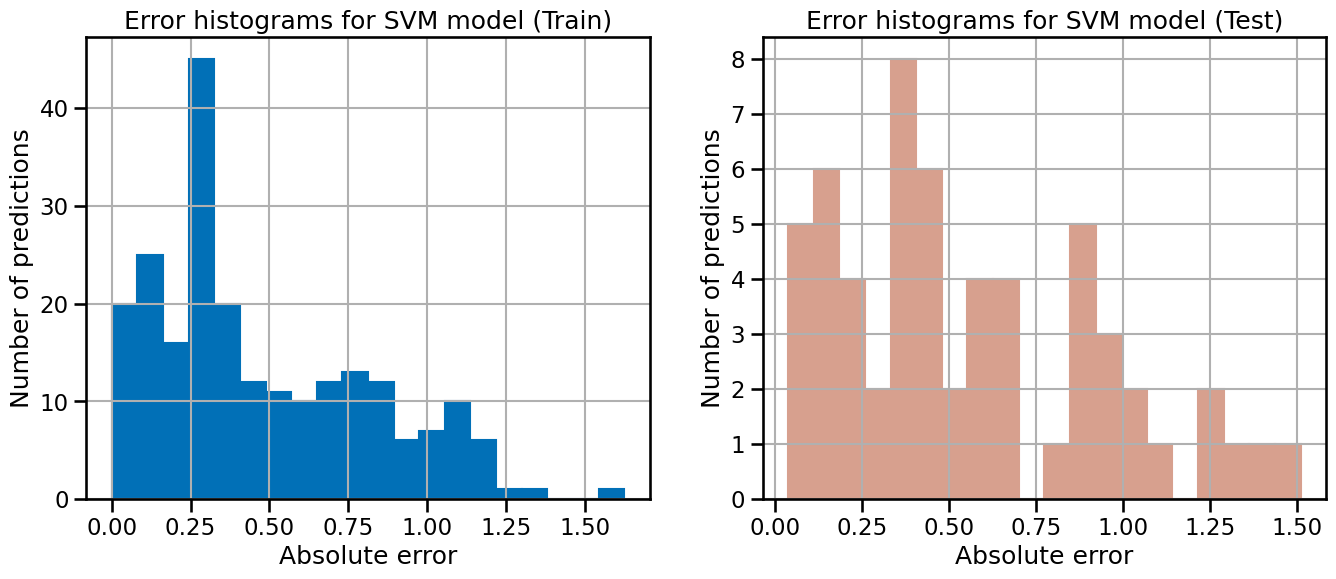

In [86]:
plt.figure(figsize=(16, 6))

# Left : train
plt.subplot(1, 2, 1)
plt.hist(errors_train_svm, bins=20, color='#0170B7', edgecolor='#0170B7')
plt.title('Error histograms for SVM model (Train)')
plt.xlabel('Absolute error')
plt.ylabel('Number of predictions')
plt.grid(True)


# Right : test
plt.subplot(1, 2, 2)
plt.hist(errors_test_svm, bins=20, color='#D7A08E', edgecolor='#D7A08E')
plt.title('Error histograms for SVM model (Test)')
plt.xlabel('Absolute error')
plt.ylabel('Number of predictions')
plt.grid(True)

plt.show()

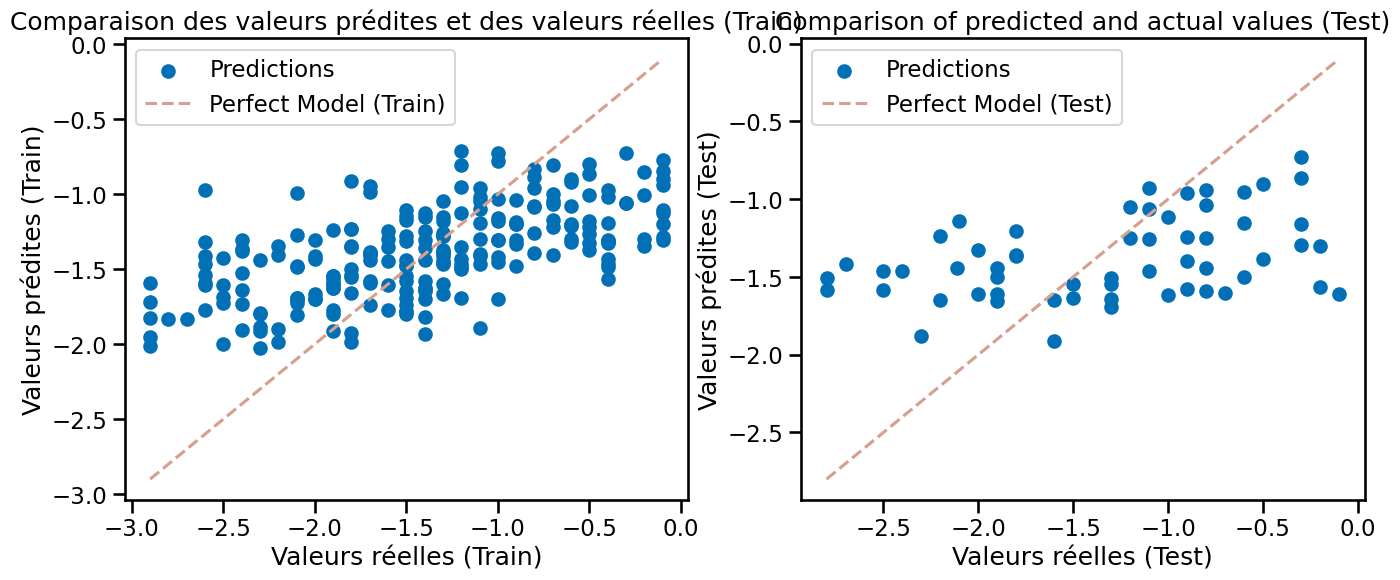

In [87]:
plt.figure(figsize=(16, 6))

# Left : Train
plt.subplot(1, 2, 1)
plt.scatter(y_2_train, y_pred_train, color='#0170B7', label='Predictions')
plt.plot([y_2_train.min(), y_2_train.max()], [y_2_train.min(), y_2_train.max()], color='#D7A08E', linestyle='--', label='Perfect Model (Train)')
plt.title('Comparaison des valeurs prédites et des valeurs réelles (Train)')
plt.xlabel('Valeurs réelles (Train)')
plt.ylabel('Valeurs prédites (Train)')
plt.legend()

# Right : test
plt.subplot(1, 2, 2)
plt.scatter(y_2_test, y_pred_test, color='#0170B7', label='Predictions')
plt.plot([y_2_test.min(), y_2_test.max()], [y_2_test.min(), y_2_test.max()], color='#D7A08E', linestyle='--', label='Perfect Model (Test)')
plt.title('Comparison of predicted and actual values (Test)')
plt.xlabel('Valeurs réelles (Test)')
plt.ylabel('Valeurs prédites (Test)')
plt.legend()

plt.show()

### Dataframe 3

In [88]:
mae_values_train_3 = []
mae_values_test_3 = []
zero_features_count_3 = []
non_zero_features_count_3 = []

In [89]:
constraint = np.arange(0.01, 5, 0.01)

for C in constraint:
    svm_regressor = SVR(kernel='rbf', tol=0.0001, C=C, epsilon=0.2)

    svm_regressor.fit(X_3_train, y_3_train)

    y_pred_test = svm_regressor.predict(X_3_test)
    y_pred_train = svm_regressor.predict(X_3_train)

    mae_test = mean_absolute_error(y_3_test, y_pred_test)
    mae_train = mean_absolute_error(y_3_train, y_pred_train)

    mae_values_train_3.append(mae_train)
    mae_values_test_3.append(mse_test)  

In [90]:
df_results_3 = pd.DataFrame({
    'C': constraint,
    'mae_train': mae_values_train_3,
    'mae_test': mae_values_test_3
})

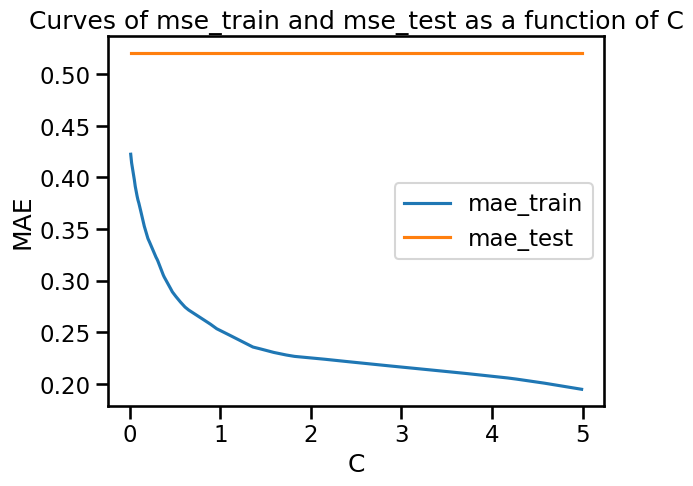

In [91]:
plt.plot(df_results_3['C'], df_results_3['mae_train'], label='mae_train')
plt.plot(df_results_3['C'], df_results_3['mae_test'], label='mae_test')

# Ajouter des titres et une légende
plt.title('Curves of mse_train and mse_test as a function of C')
plt.xlabel('C')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [92]:
param_grid = {
    'C': np.arange(0.01, 5, 0.01),
    'kernel': ['rbf'],  
        'epsilon' : [0.2]
}

svm_regressor = SVR()
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

random_search = GridSearchCV(svm_regressor, param_grid=param_grid, scoring=mae_scorer, cv=5)
random_search.fit(X_3_train, y_3_train)

best_C = random_search.best_params_['C']
best_kernel = random_search.best_params_['kernel']


best_svm_regressor = SVR(kernel='rbf', tol=0.0001, C=best_C, epsilon=0.2)
best_svm_regressor.fit(X_3_train, y_3_train)

y_pred_test = best_svm_regressor.predict(X_3_test)
y_pred_train = best_svm_regressor.predict(X_3_train)

mae_test_best_svm = mean_absolute_error(y_3_test, y_pred_test)
mae_train_best_svm = mean_absolute_error(y_3_train, y_pred_train)

print(f"Best C value: {best_C}, Best kernel: {best_kernel}")
print(f"Mean Absolute Error on Test Set: {mae_test_best_svm}")
print(f"Mean Absolute Error on Training Set: {mae_train_best_svm}")

Best C value: 0.28, Best kernel: rbf
Mean Absolute Error on Test Set: 0.5730656165158932
Mean Absolute Error on Training Set: 0.3242947493885478


In [93]:
# Calculate errors
errors_test_svm = np.abs(y_3_test - y_pred_test)
errors_train_svm = np.abs(y_3_train - y_pred_train)

data_svm_train = {'errors_train': errors_train_svm, 'value_train' : y_3_train, 'predictions_train' :y_pred_train}
useful_svm_train_3 = pd.DataFrame(data_svm_train)


data_svm_test = {'errors_test': errors_test_svm, 'value_test':y_3_test, 'predictions':y_pred_test}
useful_svm_test_3 = pd.DataFrame(data_svm_test)

df_sorted_svm_est_3 = useful_svm_test_3.sort_values(by='errors_test', ascending=False)

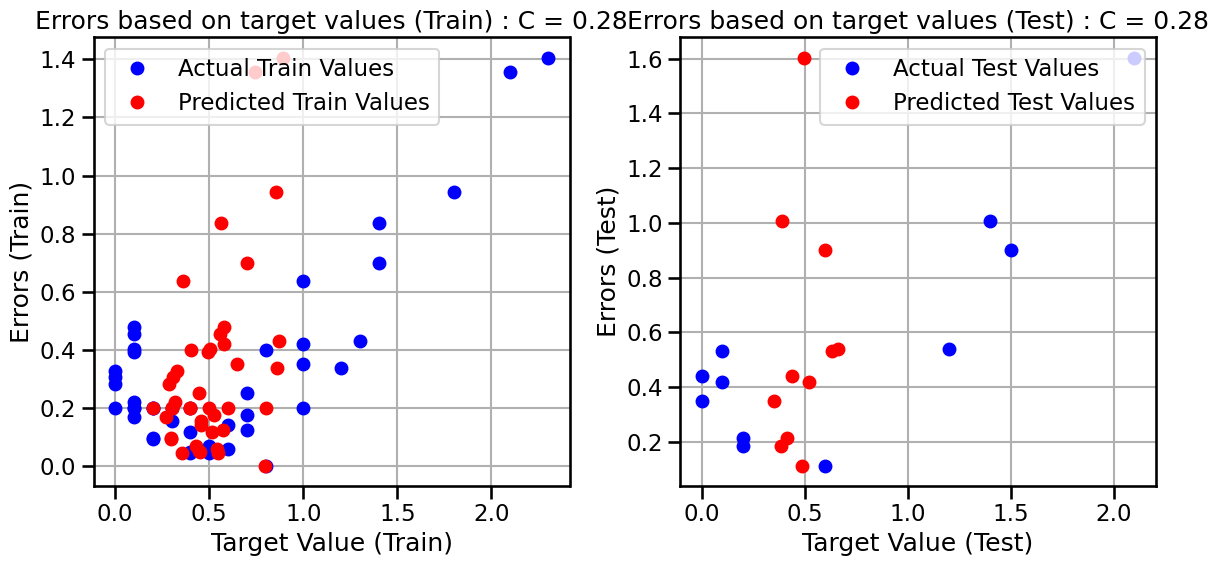

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left : train
axs[0].plot(useful_svm_train_3['value_train'], useful_svm_train_3['errors_train'], marker='o', color='b', linestyle='', label='Actual Train Values')
axs[0].plot(useful_svm_train_3['predictions_train'], useful_svm_train_3['errors_train'], marker='o', color='r', linestyle='', label='Predicted Train Values')
axs[0].set_xlabel('Target Value (Train)')
axs[0].set_ylabel('Errors (Train)')
axs[0].set_title(f'Errors based on target values (Train) : C = {best_C}')
axs[0].grid(True)
axs[0].legend()

# Right : test
axs[1].plot(useful_svm_test_3['value_test'], useful_svm_test_3['errors_test'], marker='o', color='b', linestyle='', label='Actual Test Values')
axs[1].plot(useful_svm_test_3['predictions'], useful_svm_test_3['errors_test'], marker='o', color='r', linestyle='', label='Predicted Test Values')
axs[1].set_xlabel('Target Value (Test)')
axs[1].set_ylabel('Errors (Test)')
axs[1].set_title(f'Errors based on target values (Test) : C = {best_C}')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()

# Afficher les graphiques
plt.show()

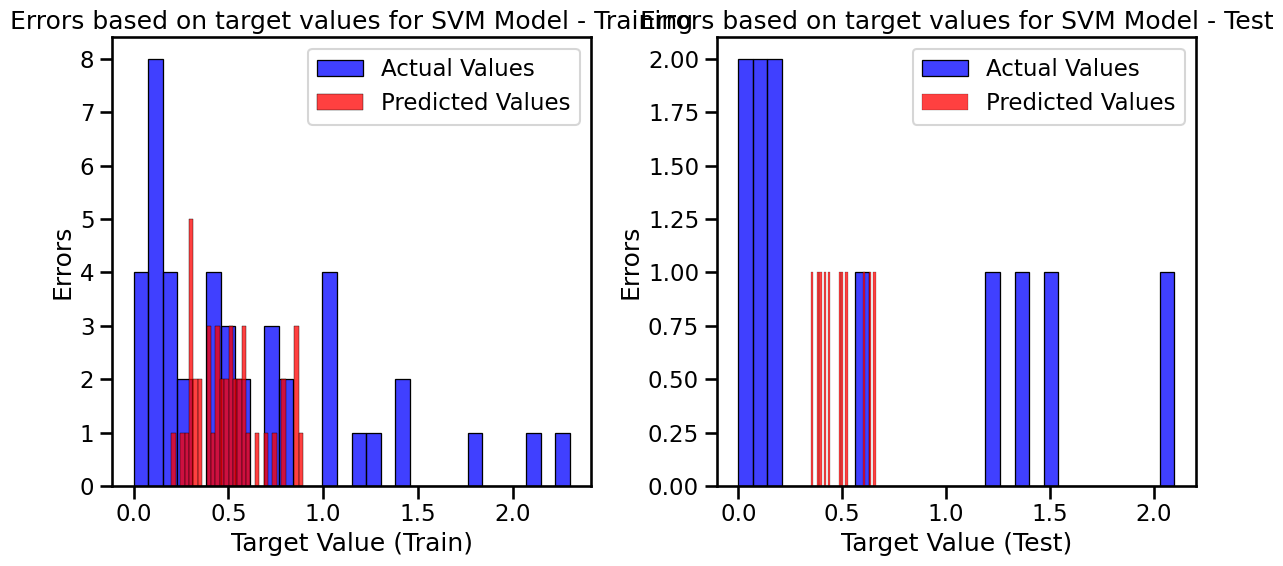

In [95]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left Histogram : Train
sns.histplot(x='value_train', data=useful_svm_train_3, color='b', linestyle='-', label='Actual Values', bins=30, ax=axs[0])
sns.histplot(x='predictions_train', data=useful_svm_train_3, color='r', linestyle='-', label='Predicted Values', bins=30, ax=axs[0])
axs[0].set_xlabel('Target Value (Train)')
axs[0].set_ylabel('Errors')
axs[0].set_title('Errors based on target values for SVM Model - Training')
axs[0].legend()

# Right Histogram : Test
sns.histplot(x='value_test', data=useful_svm_test_3, color='b', linestyle='-', label='Actual Values', bins=30, ax=axs[1])
sns.histplot(x='predictions', data=useful_svm_test_3, color='r', linestyle='-', label='Predicted Values', bins=30, ax=axs[1])
axs[1].set_xlabel('Target Value (Test)')
axs[1].set_ylabel('Errors')
axs[1].set_title('Errors based on target values for SVM Model - Test')
axs[1].legend()

plt.tight_layout()

plt.show()

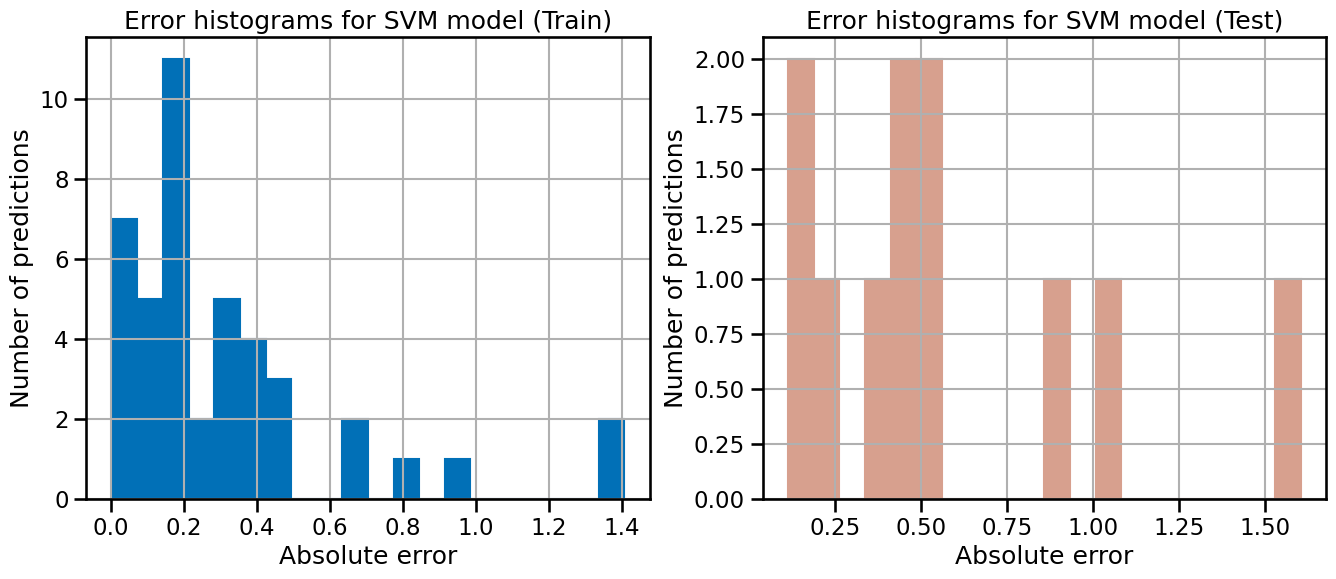

In [96]:
plt.figure(figsize=(16, 6))

# Left : train
plt.subplot(1, 2, 1)
plt.hist(errors_train_svm, bins=20, color='#0170B7', edgecolor='#0170B7')
plt.title('Error histograms for SVM model (Train)')
plt.xlabel('Absolute error')
plt.ylabel('Number of predictions')
plt.grid(True)

# Right : test
plt.subplot(1, 2, 2)
plt.hist(errors_test_svm, bins=20, color='#D7A08E', edgecolor='#D7A08E')
plt.title('Error histograms for SVM model (Test)')
plt.xlabel('Absolute error')
plt.ylabel('Number of predictions')
plt.grid(True)

plt.show()

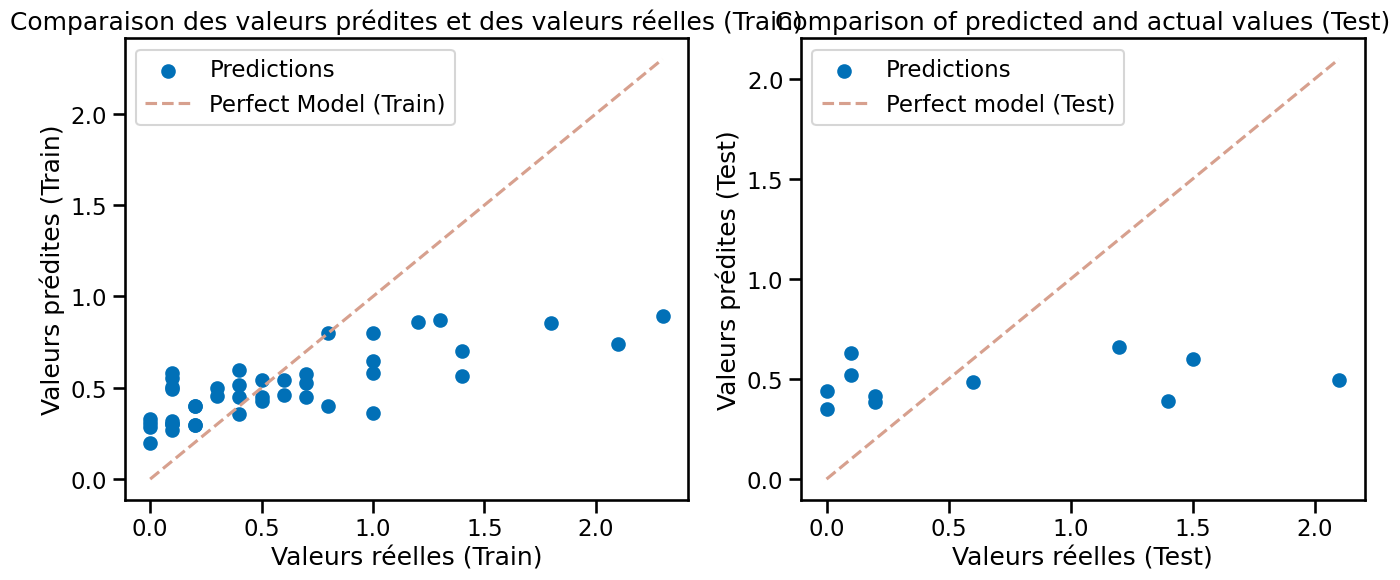

In [97]:
plt.figure(figsize=(16, 6))

# Left : Train
plt.subplot(1, 2, 1)
plt.scatter(y_3_train, y_pred_train, color='#0170B7', label='Predictions')
plt.plot([y_3_train.min(), y_3_train.max()], [y_3_train.min(), y_3_train.max()], color='#D7A08E', linestyle='--', label='Perfect Model (Train)')
plt.title('Comparaison des valeurs prédites et des valeurs réelles (Train)')
plt.xlabel('Valeurs réelles (Train)')
plt.ylabel('Valeurs prédites (Train)')
plt.legend()

# Right : test
plt.subplot(1, 2, 2)
plt.scatter(y_3_test, y_pred_test, color='#0170B7', label='Predictions')
plt.plot([y_3_test.min(), y_3_test.max()], [y_3_test.min(), y_3_test.max()], color='#D7A08E', linestyle='--', label='Perfect model (Test)')
plt.title('Comparison of predicted and actual values (Test)')
plt.xlabel('Valeurs réelles (Test)')
plt.ylabel('Valeurs prédites (Test)')
plt.legend()

plt.show()